# Using Samples

Input a sample, adjust $\mathrm E[X_i\mid X]$ and related items.

See IC_and_rearrangement.ipynb for IC and re-arr algo tests. 

## Samples in Aggregate

`make_sample_style_agg` performs the following steps

1. makes a random correlation matrix (rcm) using vines
2. makes a test sample based on input means and CVs with correlation rcm, using Iman Conover 
3. displays achieved corr and optionally a scatter plot of the sample
4. sorts sample and reset index, display stats for sample (p values and CV)
5. make each sample agg as a dhistogram
6. make port from the aggs and hence compute the independent sum 
7. update port and total agg
8. adjust exa to create a new df
9. Return 'sample', 'aggregates', 'total', 'port', 'df_exa'

## Provenance

* New, Sept 26, 2022 (Loudoun Road!) 

In [1]:
import aggregate as agg
from aggregate import build
import scipy.stats as ss
from pandas.plotting import scatter_matrix
import samples as sam

time: 694 ms


Parser debugging for UnderwritingParser written to C:\Users\steve\aggregate\parser\parser.out


## Samples in aggregate

In [2]:
res = sam.portfolio_from_sample(10000, [100, 100, 100, 100, 100, 100, 100, 50], [.1, 0.2, .2, .2,  .3, .4, .5, .9], 
                                rcm_p=.8, plot=False, 
                                log2=13, bs=1, remove_fuzz=True)

,A,B,C,D,E,F,G,H
A,1.000,468.271m,460.223m,770.506m,681.783m,567.987m,799.071m,566.342m
B,468.271m,1.000,857.896m,778.241m,464.741m,854.894m,445.440m,327.785m
C,460.223m,857.896m,1.000,866.323m,761.022m,939.970m,535.846m,445.265m
D,770.506m,778.241m,866.323m,1.000,876.920m,932.719m,819.319m,653.443m
E,681.783m,464.741m,761.022m,876.920m,1.000,802.550m,842.878m,762.586m
F,567.987m,854.894m,939.970m,932.719m,802.550m,1.000,697.825m,595.535m
G,799.071m,445.440m,535.846m,819.319m,842.878m,697.825m,1.000,887.287m
H,566.342m,327.785m,445.265m,653.443m,762.586m,595.535m,887.287m,1.000


,total,A,B,C,D,E,F,G,H
count,10.000k,10.000k,10.000k,10.000k,10.000k,10.000k,10.000k,10.000k,10.000k
mean,750.382,99.906,99.968,99.935,100.167,99.597,100.597,100.058,50.155
std,202.865,9.984,20.254,19.812,19.698,29.900,39.796,48.723,45.526
min,276.243,68.975,48.200,50.389,47.718,27.115,20.596,10.651,950.288m
10%,526.109,87.498,75.773,76.161,76.672,65.422,57.021,48.866,13.938
25%,608.498,92.889,85.517,86.000,86.261,78.382,72.031,65.873,22.130
50%,720.243,99.390,98.061,98.144,98.441,95.188,93.744,89.808,37.416
75%,856.517,106.498,112.100,112.116,112.198,116.067,121.407,123.546,62.940
90%,1.012k,112.916,126.432,126.095,125.813,138.216,153.193,162.597,99.416
95%,1.120k,116.902,136.027,135.105,134.881,154.472,174.768,192.168,129.047


09:38.027|2192|INFO      | aggregate.port, add_exa|  Portfolio.add_exa | test_from_df: sum of p_total is 1 - 5.10702591e-15 NOT RESCALING
09:38.030|2208|INFO      | aggregate.port, add_exa|  Portfolio.add_exa | test_from_df: S <= 0 values has length 5795


Adding p_total to sample_in
time: 1.79 s


In [3]:
res.sample

,total,A,B,C,D,E,F,G,H
0,276.243,69.212,49.613,50.389,47.718,27.115,20.596,10.651,950.288m
1,313.690,76.695,61.374,52.779,51.131,27.601,25.575,17.301,1.234
2,319.986,70.166,56.712,55.215,50.995,39.339,25.979,15.888,5.692
3,319.998,80.343,48.200,51.431,51.547,41.675,24.821,19.291,2.689
4,323.728,82.469,55.370,50.477,49.184,33.026,24.879,24.176,4.148
...,...,...,...,...,...,...,...,...,...
9995,2.073k,120.586,146.655,174.269,187.473,247.455,308.132,376.406,512.501
9996,2.127k,115.393,96.045,127.232,145.986,245.781,189.591,353.597,853.296
9997,2.134k,136.051,221.794,207.782,197.064,233.052,401.065,388.124,349.264
9998,2.147k,124.547,189.824,171.458,195.580,218.244,373.146,380.161,494.355


time: 18.6 ms


In [4]:
res.port

,A,B,C,D,E,F,G,H,total
"(freq, mean)",1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,8.000
"(sev, mean)",99.906,99.968,99.935,100.167,99.597,100.597,100.058,50.155,93.798
"(agg, mean)",99.906,99.968,99.935,100.167,99.597,100.597,100.058,50.155,750.382
"(freq, cv)",0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
"(sev, cv)",99.930m,202.593m,198.235m,196.645m,300.194m,395.579m,486.925m,907.674m,384.236m
"(agg, cv)",99.930m,202.593m,198.235m,196.645m,300.194m,395.579m,486.925m,907.674m,120.779m
"(freq, skew)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(sev, skew)",281.922m,632.944m,576.414m,609.299m,973.575m,1.233,1.470,3.662,1.062
"(agg, skew)",281.922m,632.944m,576.414m,609.299m,973.575m,1.233,1.470,3.662,851.459m
Mean,99.906,99.968,99.935,100.167,99.597,100.597,100.058,50.155,750.382


time: 19.9 ms


In [5]:
port2 = agg.Portfolio('FromSample', res.sample)

time: 166 ms


In [6]:
port2.update(13, 1, remove_fuzz=True)
port2

09:39.098|2192|INFO      | aggregate.port, add_exa|  Portfolio.add_exa | FromSample: sum of p_total is 1 - 5.10702591e-15 NOT RESCALING
09:39.101|2208|INFO      | aggregate.port, add_exa|  Portfolio.add_exa | FromSample: S <= 0 values has length 5795


,A,B,C,D,E,F,G,H,total
"(freq, mean)",1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,8.000
"(sev, mean)",99.906,99.968,99.935,100.167,99.597,100.597,100.058,50.155,93.798
"(agg, mean)",99.906,99.968,99.935,100.167,99.597,100.597,100.058,50.155,750.382
"(freq, cv)",0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
"(sev, cv)",99.930m,202.593m,198.235m,196.645m,300.194m,395.579m,486.925m,907.674m,384.236m
"(agg, cv)",99.930m,202.593m,198.235m,196.645m,300.194m,395.579m,486.925m,907.674m,120.779m
"(freq, skew)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(sev, skew)",281.922m,632.944m,576.414m,609.299m,973.575m,1.233,1.470,3.662,1.062
"(agg, skew)",281.922m,632.944m,576.414m,609.299m,973.575m,1.233,1.470,3.662,851.459m
Mean,99.906,99.968,99.935,100.167,99.597,100.597,100.058,50.155,750.382


time: 451 ms


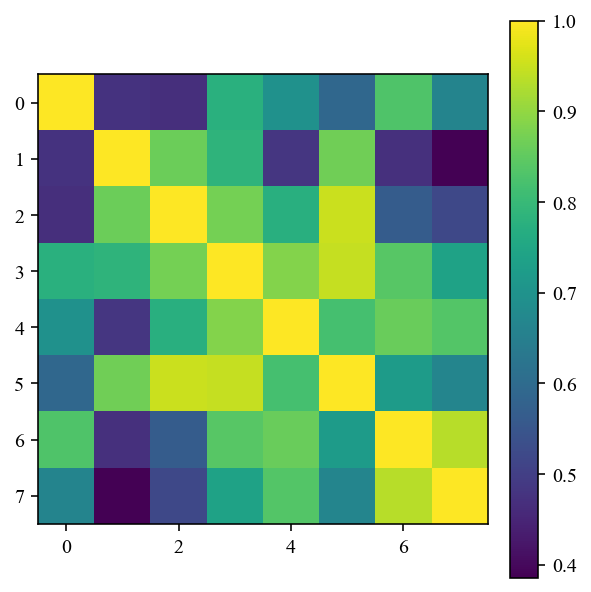

time: 220 ms


In [7]:
%%sf 1 1 4 4 
img = ax.imshow(res.rcm)
f.colorbar(img)

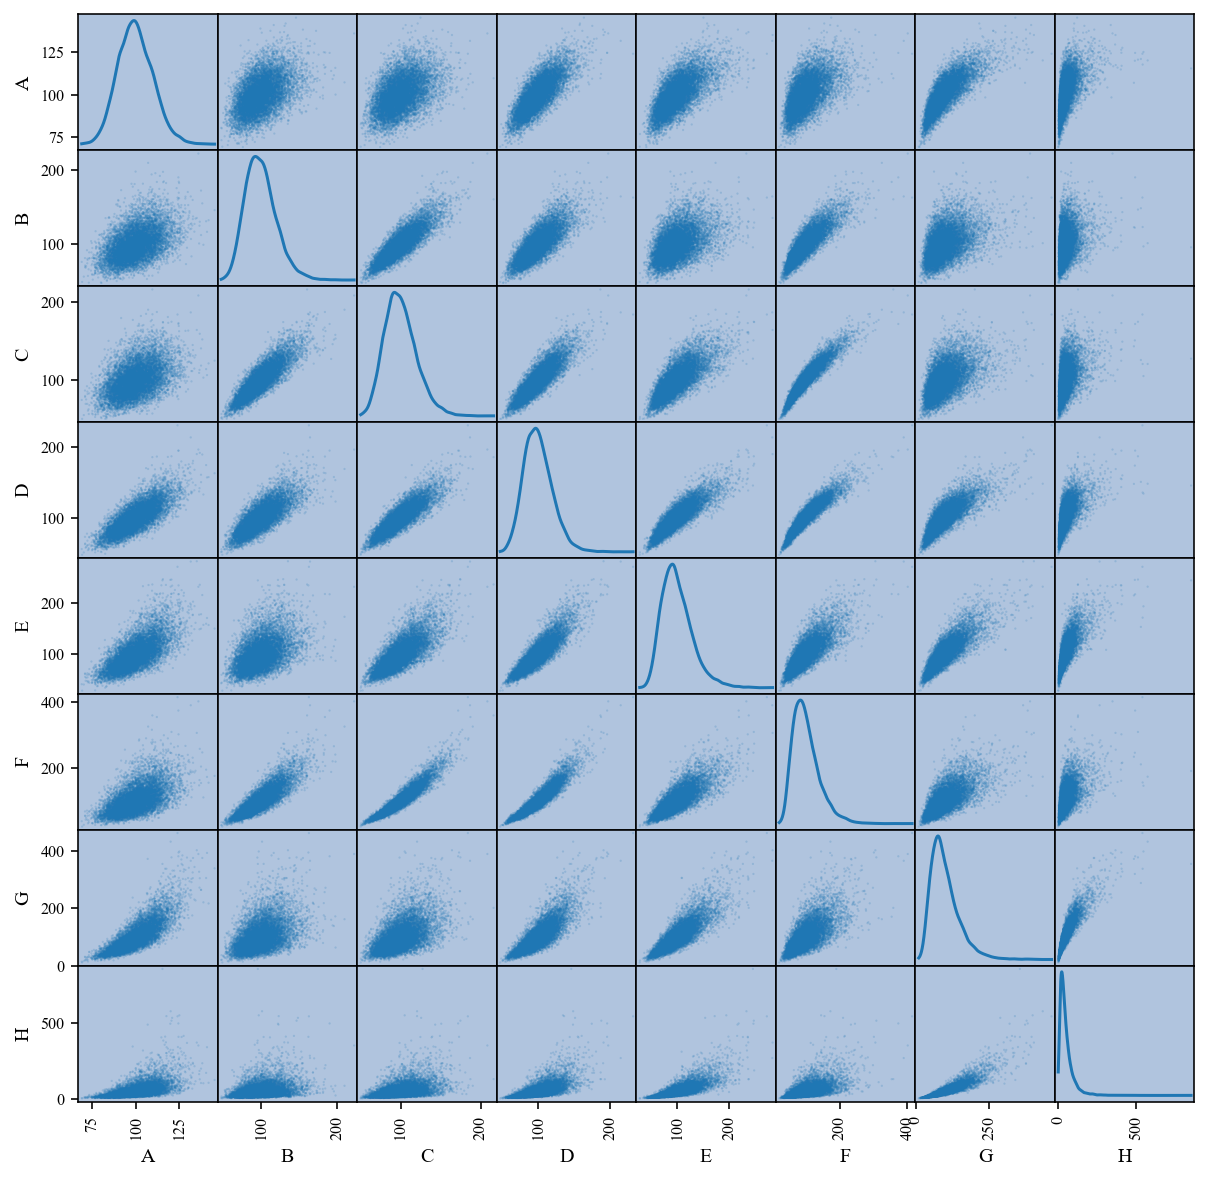

time: 5.03 s


In [8]:
# leave out total
scatter_matrix(res.sample.iloc[:, 1:], marker='.', s=5, alpha=.2, figsize=(10, 10), diagonal='kde');

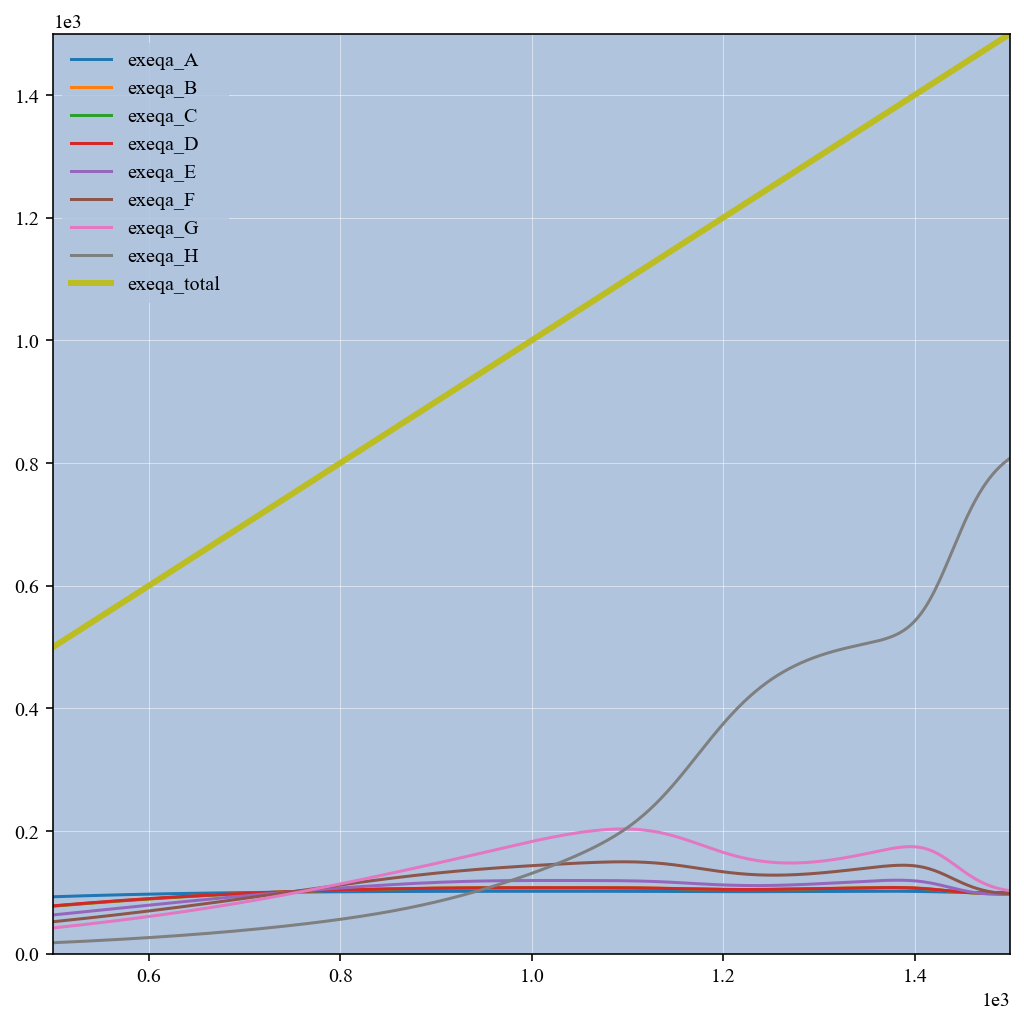

time: 306 ms


In [12]:
%%sf 1 1 7 7
res.port.density_df.filter(regex='exeqa_[A-Z]'
                 ).plot(xlim=[500, 1500], ylim=[0, 600], ax=ax)
res.port.density_df.filter(regex='exeqa_t'
                 ).plot(xlim=[500, 1500], ylim=[0, 1500], lw=3, ax=ax)

ax.grid(lw=.25, c='w')

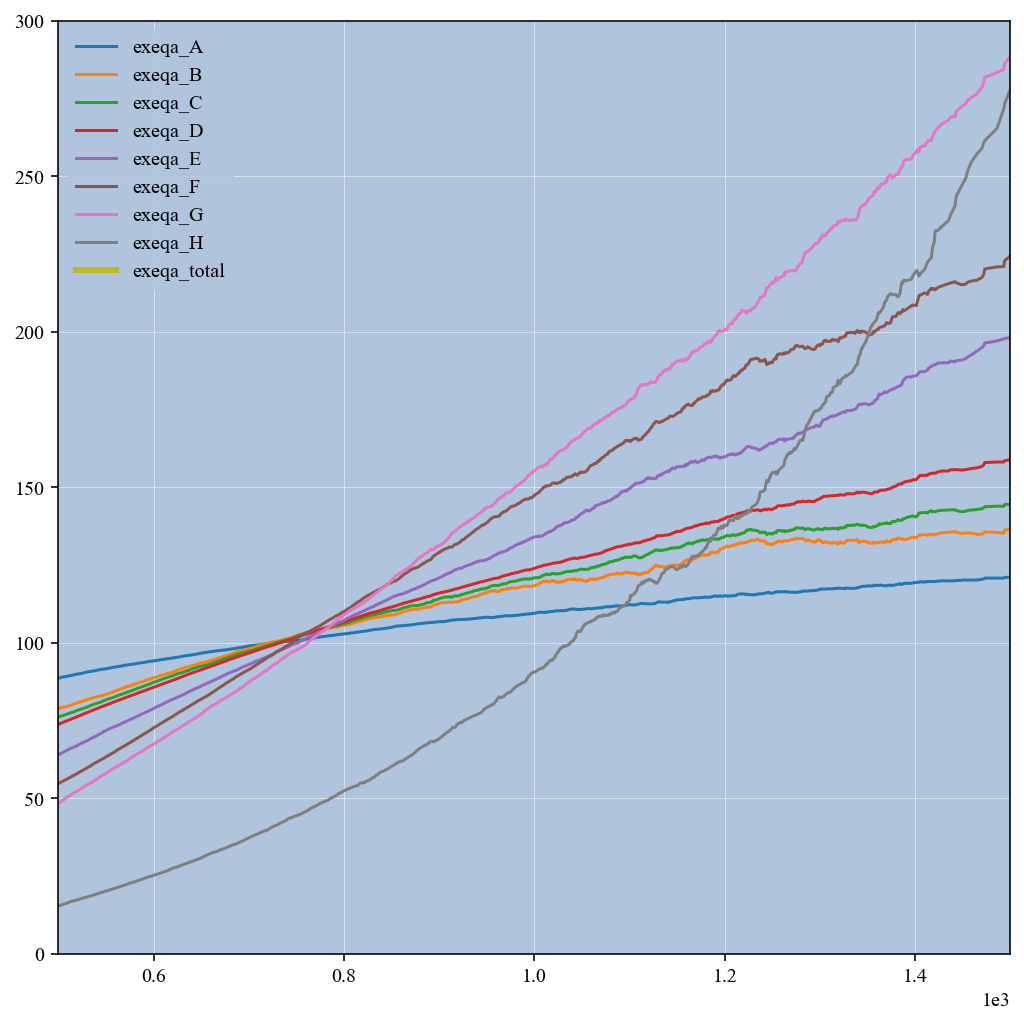

time: 269 ms


In [14]:
%%sf 1 1 7 7
res.df_exa.filter(regex='p_total|exeqa_[A-Z]'
                 ).query('p_total > 1e-15').drop(
    columns='p_total' ).rolling(100, center=True).mean().plot(xlim=[500, 1500], ylim=[0, 300], ax=ax)

res.df_exa.filter(regex='exeqa_t'
                 ).plot(xlim=[500, 1500], ylim=[0, 300], lw=3, ax=ax)

ax.grid(lw=.25, c='w')

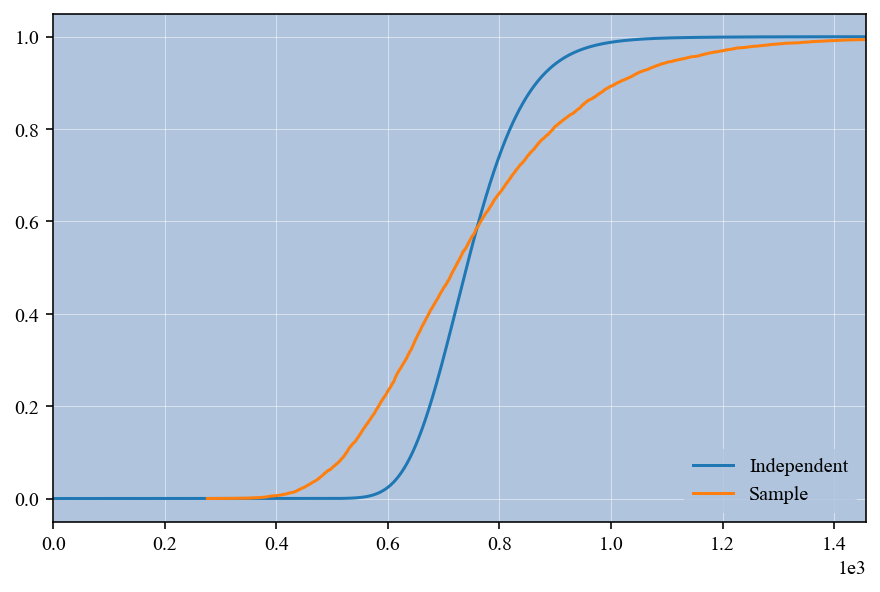

time: 167 ms


In [15]:
%%sf  1 1 6 4
res.port.density_df.F.plot(ax=ax, label='Independent')
ax.plot(res.sample.total, np.linspace(0,1,len(res.sample)), label='Sample')
ax.grid(lw=.25, c='w')
ax.set(xlim=[0, res.port.q(.9999)])
ax.legend(loc='lower right')

### Testing

In [16]:
sample = res.sample
self = port = res.port
sample.head()

,total,A,B,C,D,E,F,G,H
0,276.243,69.212,49.613,50.389,47.718,27.115,20.596,10.651,950.288m
1,313.690,76.695,61.374,52.779,51.131,27.601,25.575,17.301,1.234
2,319.986,70.166,56.712,55.215,50.995,39.339,25.979,15.888,5.692
3,319.998,80.343,48.200,51.431,51.547,41.675,24.821,19.291,2.689
4,323.728,82.469,55.370,50.477,49.184,33.026,24.879,24.176,4.148


time: 10.8 ms


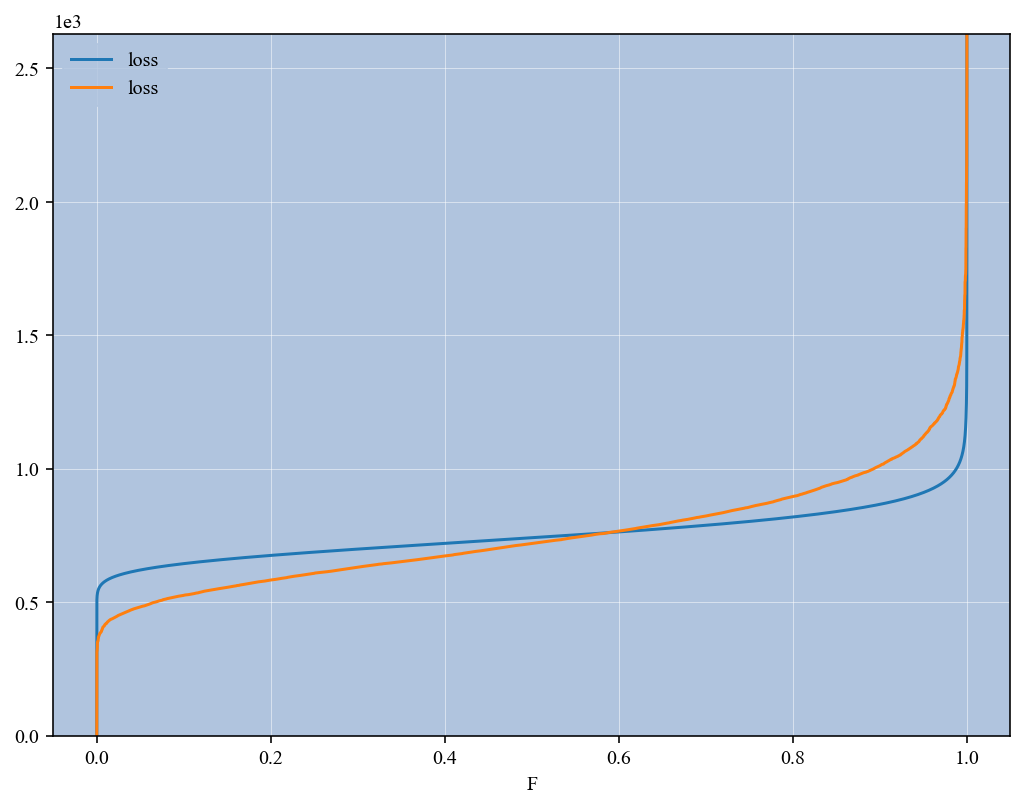

time: 213 ms


In [17]:
%%sf 1 1 7 5.5

res.port.density_df.set_index('F')[['loss']].plot(ax=ax, label='Independent')

res.df_exa.set_index('F')[['loss']].plot(ax=ax, label='Sample')

ax.legend()
ax.grid(lw=.25, c='w')
ax.set(ylim=[0, res.sample.total.max()* 1.1])

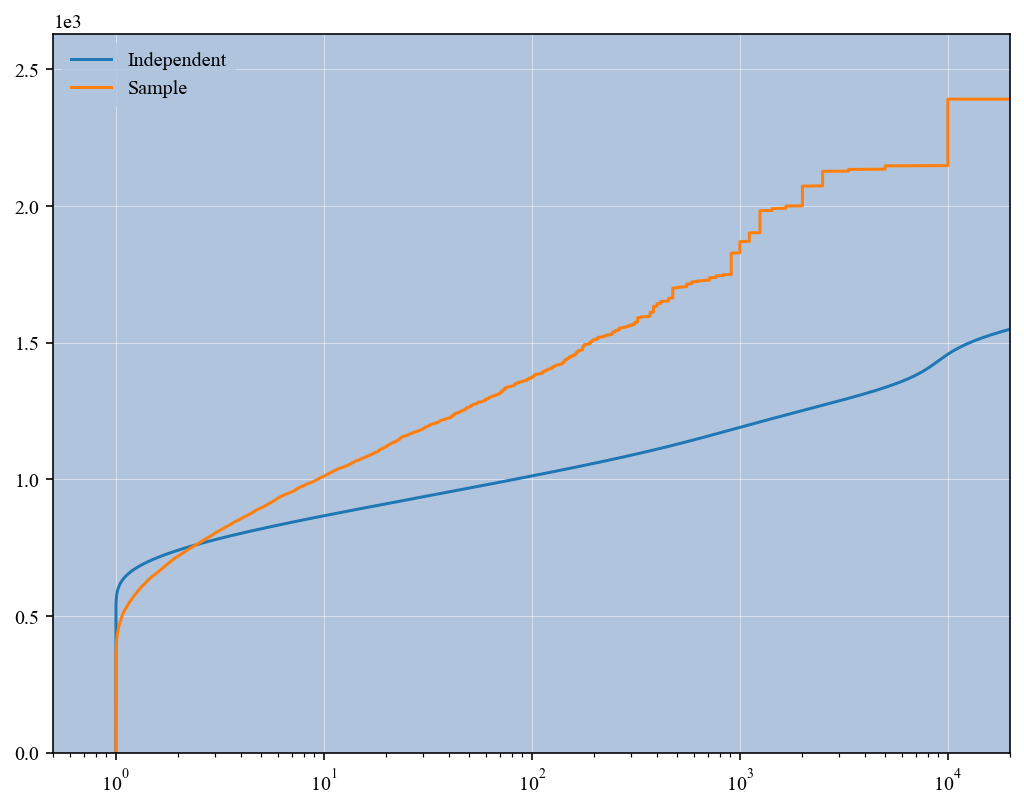

time: 539 ms


In [18]:
%%sf 1 1 7 5.5

rp = 1 / (1 - np.minimum(1, res.port.density_df.F))

ax.plot(rp, res.port.density_df.loss, label='Independent')

rp = 1 / (1 - np.minimum(1, res.df_exa.F))
ax.plot(rp, res.df_exa.loss, label='Sample')

ax.set(xscale='log', xlim=[.5, 20000], ylim=[0, res.sample.total.max() * 1.1]) 
ax.legend()
ax.grid(lw=.25, c='w')

In [19]:
res.port.calibrate_distortions(ROEs=[.125], Ps=[.999], df=[0, .995], strict=False)
dist_i = res.port.dists
res.port.dist_ans

$S$   $\iota$  $\delta$     $\nu$     $EL$  \
$a$    LR       method                                                     
1.190k 938.940m ph       995.265u  125.000m  111.111m  888.889m  750.655   
                wang     995.265u  125.000m  111.111m  888.889m  750.655   
                cll      995.265u  125.000m  111.111m  888.889m  750.655   
                lep      995.265u  125.000m  111.111m  888.889m  750.655   
                ly       995.265u  125.000m  111.111m  888.889m  750.655   
                clin     995.265u  125.000m  111.111m  888.889m  750.655   
                dual     995.265u  125.000m  111.111m  888.889m  750.655   
                ccoc     995.265u  125.000m  111.111m  888.889m  750.655   
                tvar     995.265u  125.000m  111.111m  888.889m  750.655   
                wtdtvar  995.265u  125.000m  111.111m  888.889m  750.655   

                             $P$   Levg      $K$       ROE     param     error  
$a$    LR       method                                                          
1.190k 938.940m ph       799.471  2.047  390.529  125.000m  616.450m   95.497p  
                wang     799.471  2.047  390.529  125.000m  516.146m   46.416n  
                cll      799.471  2.047  390.529  125.000m  650.144m  909.495f  
                lep      799.471  2.047  390.529  125.000m  394.292m   -2.655u  
                ly       799.471  2.047  390.529  125.000m     1.086 -269.210p  
                clin     799.471  2.047  390.529  125.000m     1.322     0.000  
                dual     799.471  2.047  390.529  125.000m     1.973 -391.340n  
                ccoc     799.471  2.047  390.529  125.000m  125.000m     0.000  
                tvar     799.471  2.047  390.529  125.000m  356.603m    9.141u  
                wtdtvar  799.471  2.047  390.529  125.000m  131.596m  113.687f

time: 83.9 ms


In [26]:
assets = res.port.dist_ans.index[0][0]

time: 1 ms


In [20]:
el, pr = res.port.dist_ans.iloc[0, 4:6]
lr = el / pr
lr, el, pr

(0.9389395286868996, 750.6551709048716, 799.4712630265526)

time: 3.7 ms


In [ ]:
ans0 = res.port.apply_distortions(res.port.dists, Ps=[0.999], num_plots=0, efficient=True)

In [23]:
# execute switcheroo
densit_df_0 = res.port.density_df.copy()
res.port.density_df = res.df_exa
res.port._linear_quantile_function = None 

time: 6.02 ms


In [41]:
res.port.calibrate_distortions(LRs=[lr], As=[assets], df=[0, .995], strict=False)
prem = res.port.dist_ans.iloc[0, 5]
dist_s = res.port.dists
res.port.dist_ans

$S$   $\iota$  $\delta$     $\nu$     $EL$  \
$a$    LR       method                                                    
1.190k 938.940m ph       32.700m  122.167m  108.867m  891.133m  744.986   
                wang     32.700m  122.167m  108.867m  891.133m  744.986   
                cll      32.700m  122.167m  108.867m  891.133m  744.986   
                lep      32.700m  122.167m  108.867m  891.133m  744.986   
                ly       32.700m  122.167m  108.867m  891.133m  744.986   
                clin     32.700m  122.167m  108.867m  891.133m  744.986   
                dual     32.700m  122.167m  108.867m  891.133m  744.986   
                ccoc     32.700m  122.167m  108.867m  891.133m  744.986   
                tvar     32.700m  122.167m  108.867m  891.133m  744.986   
                wtdtvar  32.700m  122.167m  108.867m  891.133m  744.986   

                             $P$   Levg      $K$       ROE     param     error  
$a$    LR       method                                                          
1.190k 938.940m ph       793.434  2.001  396.566  122.167m  765.359m    9.436p  
                wang     793.434  2.001  396.566  122.167m  259.724m  403.588p  
                cll      793.434  2.001  396.566  122.167m  810.928m    4.544u  
                lep      793.434  2.001  396.566  122.167m  190.532m  -17.460n  
                ly       793.434  2.001  396.566  122.167m  423.355m  -35.705n  
                clin     793.434  2.001  396.566  122.167m     1.105  113.687f  
                dual     793.434  2.001  396.566  122.167m     1.376  -16.491n  
                ccoc     793.434  2.001  396.566  122.167m  122.167m     0.000  
                tvar     793.434  2.001  396.566  122.167m  166.936m    7.318u  
                wtdtvar  793.434  2.001  396.566  122.167m  108.867m     0.000

time: 44.4 ms


In [ ]:
ans1 = res.port.apply_distortions(res.port.dists, As=[assets], num_plots=0, efficient=True)

In [45]:
pd.concat((ans0[0][['exa_total', 'exag_total', 'method']], 
           ans1[0][['exa_total', 'exag_total', 'method']]), axis=1, keys=['indep', 'sample'])

indep                        sample                    
       exa_total exag_total   method exa_total exag_total   method
1.190k   750.655    799.471       ph   744.986    793.434       ph
1.190k   750.655    799.471     wang   744.986    793.434     wang
1.190k   750.655    799.471      cll   744.986    793.434      cll
1.190k   750.655    799.471      lep   744.986    793.434      lep
1.190k   750.655    799.471       ly   744.986    793.434       ly
1.190k   750.655    799.471     clin   744.986    793.434     clin
1.190k   750.655    799.471     dual   744.986    793.434     dual
1.190k   750.655    799.471     ccoc   744.986    793.434     ccoc
1.190k   750.655    799.471     tvar   744.986    793.434     tvar
1.190k   750.655    799.471  wtdtvar   744.986    793.434  wtdtvar

time: 14.9 ms


In [46]:
comp.iloc[:, 0:-1].max(axis=1) - comp.iloc[:, 0:-1].min(axis=1)

method                 
ccoc     correl  1.190k    541.911m
         indep   1.190k    696.782m
wtdtvar  correl  1.190k    300.080m
         indep   1.190k    357.165m
ph       correl  1.190k    164.607m
         indep   1.190k    262.240m
dual     correl  1.190k    115.291m
         indep   1.190k    165.748m
wang     correl  1.190k    136.458m
         indep   1.190k    202.741m
tvar     correl  1.190k     98.102m
         indep   1.190k    149.134m
dtype: float64

time: 6 ms


In [47]:
bit = pd.concat((ans0[0], ans1[0]), keys=['indep', 'correl']).set_index('method', append=True).\
    reorder_levels(['method', 0, 1]).sort_index()

comp = (bit.filter(regex='exa_').sort_index(axis=1).to_numpy() / bit.filter(regex='exag_')
       ).sort_index(axis=1).rename(columns=lambda x: x.replace('exag', 'lr'))
comp = comp.loc[['ccoc', 'wtdtvar', 'ph', 'dual', 'wang', 'tvar']]
comp['range'] = comp.iloc[:, 0:-1].max(axis=1) - comp.iloc[:, 0:-1].min(axis=1)
comp

lr_A      lr_B      lr_C      lr_D      lr_E  \
method                                                                    
ccoc    correl 1.190k     1.116     1.076     1.056     1.011  975.489m   
        indep  1.190k     1.131     1.112     1.113     1.113     1.059   
wtdtvar correl 1.190k     1.014     1.001  992.901m  979.466m  947.442m   
        indep  1.190k  999.935m  993.265m  993.739m  993.782m  979.949m   
ph      correl 1.190k  988.298m  972.492m  967.544m  960.743m  938.803m   
        indep  1.190k  997.282m  983.755m  984.582m  984.807m  960.794m   
dual    correl 1.190k  981.081m  963.455m  958.918m  953.860m  936.031m   
        indep  1.190k  993.521m  973.874m  974.898m  975.347m  945.392m   
wang    correl 1.190k  984.024m  967.374m  962.672m  956.883m  937.162m   
        indep  1.190k  994.880m  977.992m  978.940m  979.277m  951.656m   
tvar    correl 1.190k  978.984m  959.917m  955.342m  951.210m  935.040m   
        indep  1.190k  992.737m  971.318m  972.365m  972.906m  942.106m   

                           lr_F      lr_G      lr_H  lr_total     range  
method                                                                   
ccoc    correl 1.190k  872.673m  841.101m  574.231m  938.940m  541.911m  
        indep  1.190k  878.825m  855.838m  433.947m  938.940m  696.782m  
wtdtvar correl 1.190k  925.074m  877.291m  714.317m  938.940m  300.080m  
        indep  1.190k  948.466m  897.432m  642.770m  938.940m  357.165m  
ph      correl 1.190k  919.206m  897.648m  823.691m  938.940m  164.607m  
        indep  1.190k  925.695m  880.973m  735.042m  938.940m  262.240m  
dual    correl 1.190k  918.022m  905.186m  865.790m  938.940m  115.291m  
        indep  1.190k  910.281m  875.406m  827.772m  938.940m  165.748m  
wang    correl 1.190k  918.492m  901.753m  847.566m  938.940m  136.458m  
        indep  1.190k  915.826m  875.118m  792.139m  938.940m  202.741m  
tvar    correl 1.190k  917.911m  908.737m  880.883m  938.940m   98.102m  
        indep  1.190k  908.329m  878.018m  843.603m  938.940m  149.134m

time: 32.8 ms


In [48]:
adf = res.port.analyze_distortions(a=assets, regex='ccoc|wang|ph|dual|tvar|wtd', add_comps=False)

19:21.379|3772|INFO      | aggregate.port, analyze_distortions|  Running distortion Proportional Hazard, 0.765 through analyze_distortion, p=0.967299999999995...
19:21.449|3772|INFO      | aggregate.port, analyze_distortions|  Running distortion Wang-normal, 0.260 through analyze_distortion, p=0.967299999999995...
19:21.521|3772|INFO      | aggregate.port, analyze_distortions|  Running distortion Dual Moment, 1.376 through analyze_distortion, p=0.967299999999995...
19:21.589|3772|INFO      | aggregate.port, analyze_distortions|  Running distortion Constant CoC, 0.122, mass 0.109 through analyze_distortion, p=0.967299999999995...
19:21.609|3008|INFO      | aggregate.port, apply_distortion|  Index of ess_sup is 2392
19:21.613|3026|WARNING   | aggregate.port, apply_distortion|  No mass_hints given, using estimated mass_hints = [  0.051891    0.06808   0.076769   0.096803    0.11406    0.17313    0.19287    0.22639] for ccoc mass 0.10886721738714666 Constant CoC, 0.122, mass 0.109
19:21.61

time: 449 ms


In [49]:
adf.comp_df.xs('LR', axis=0, level=1).sort_values('C')#.style.format('{:.4%}').T#background_gradient('viridis_r', axis=1)

line,A,B,C,D,E,F,G,H,total
Method,,,,,,,,,
Dist tvar,978.984m,959.917m,955.342m,951.210m,935.040m,917.911m,908.737m,880.883m,938.940m
Dist dual,981.081m,963.455m,958.918m,953.860m,936.031m,918.022m,905.186m,865.790m,938.940m
Dist wang,984.024m,967.374m,962.672m,956.883m,937.162m,918.492m,901.753m,847.566m,938.940m
Dist ph,988.298m,972.492m,967.544m,960.743m,938.803m,919.206m,897.648m,823.691m,938.940m
Dist wtdtvar,1.014,1.001,992.901m,979.466m,947.442m,925.074m,877.291m,714.317m,938.940m
Dist ccoc,1.116,1.076,1.056,1.011,975.489m,872.673m,841.101m,574.231m,938.940m


time: 13.2 ms


In [64]:
bd = agg.Bounds(res.df_exa.rename(columns={'loss': 'total'}))
p_star = bd.p_star('total', prem, assets)
p_star

23:23.121| 141|INFO      | aggregate.bounds, make_tvar_function|  Computed mean loss for total = 750.381600000000049 (diff 0.000000000005116) max F = 0.9999999999999915
23:23.126| 147|INFO      | aggregate.bounds, make_tvar_function|  sup=2391.0, max = 2391.0 "inf" = 8191.0


0.1669352365003631

time: 13.4 ms


In [51]:
dist_s

{'ph': ph (0.7653592944629563),
 'wang': wang (0.259724458861256),
 'cll': cll (0.8109280116148775),
 'lep': lep (0.19053158345724236, 0.03),
 'ly': ly (0.42335450184829404, 0.03),
 'clin': clin (1.104971541219601, 0.03),
 'dual': dual (1.37564544566585),
 'ccoc': ccoc (0.1221672230124243, 0),
 'tvar': tvar (0.1669355082529739),
 'wtdtvar': wtdtvar (0.10886721738714616)}

time: 3.08 ms


In [70]:
bd.tvar_cloud('total', premium=prem, a=assets, n_tps=129, s=64)

24:42.125| 141|INFO      | aggregate.bounds, make_tvar_function|  Computed mean loss for total = 750.381600000000049 (diff 0.000000000005116) max F = 0.9999999999999915
24:42.129| 147|INFO      | aggregate.bounds, make_tvar_function|  sup=2391.0, max = 2391.0 "inf" = 8191.0
24:42.129| 225|INFO      | aggregate.bounds, tvar_array|  F(b) = 0.96730
24:42.133| 141|INFO      | aggregate.bounds, make_tvar_function|  Computed mean loss for total = 750.381600000000049 (diff 0.000000000005116) max F = 0.9999999999999915
24:42.137| 147|INFO      | aggregate.bounds, make_tvar_function|  sup=2391.0, max = 2391.0 "inf" = 8191.0
24:42.142| 426|INFO      | aggregate.bounds, compute_weights|  p_star=0.1669, len(p<=p*) = 22, len(p>p*) = 107;  pstar in ps: False
24:42.145| 479|INFO      | aggregate.bounds, tvar_cloud|  m shape = (2354, 129), hinges shape = (129, 64), types <class 'scipy.sparse._csr.csr_matrix'>, <class 'scipy.sparse._coo.coo_matrix'>


time: 28.4 ms


In [53]:
res.df_exa.filter(regex='exeqa_[A-Z]')

,exeqa_A,exeqa_B,exeqa_C,exeqa_D,exeqa_E,exeqa_F,exeqa_G,exeqa_H
0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...
8.187k,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
8.188k,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
8.189k,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
8.190k,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


time: 12.5 ms


In [54]:
a = sam.allocation_ranges(bd, res.df_exa)

time: 393 ms


In [55]:
a

alloc_A  alloc_B  alloc_C  alloc_D  alloc_E  alloc_F  \
p_lower  p_upper                                                          
0.000    171.875m  102.120  104.211  104.680  105.381  106.607  109.683   
         179.688m  102.114  104.223  104.671  105.377  106.586  109.697   
         187.500m  102.108  104.207  104.659  105.372  106.589  109.701   
         195.312m  102.101  104.182  104.643  105.365  106.598  109.699   
         203.125m  102.097  104.170  104.626  105.357  106.595  109.696   
...                    ...      ...      ...      ...      ...      ...   
164.062m 968.750m  102.128  104.219  104.676  105.397  106.626  109.719   
         976.562m  102.129  104.221  104.679  105.402  106.636  109.731   
         984.375m  102.132  104.222  104.682  105.409  106.652  109.745   
         992.188m  102.135  104.229  104.692  105.422  106.677  109.781   
         1.000     102.140  104.276  104.764  105.559  106.814  110.134   

                   alloc_G  alloc_H  
p_lower  p_upper                     
0.000    171.875m  110.218   57.019  
         179.688m  110.226   57.037  
         187.500m  110.243   57.065  
         195.312m  110.268   57.102  
         203.125m  110.290   57.140  
...                    ...      ...  
164.062m 968.750m  110.299   57.153  
         976.562m  110.323   57.194  
         984.375m  110.360   57.253  
         992.188m  110.418   57.360  
         1.000     110.732   57.830  

[2354 rows x 8 columns]

time: 18.6 ms


In [56]:
d = a.describe(percentiles=(0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99), )
d.loc['cv'] = d.loc['std'] / d.loc['mean']
d.loc['range'] = d.loc['max'] - d.loc['min']
d
# d.loc[['range']].T

,alloc_A,alloc_B,alloc_C,alloc_D,alloc_E,alloc_F,alloc_G,alloc_H
count,2.354k,2.354k,2.354k,2.354k,2.354k,2.354k,2.354k,2.354k
mean,102.037,104.016,104.489,105.324,106.737,109.956,110.976,58.383
std,104.097m,258.542m,326.554m,555.228m,746.617m,1.466,1.895,3.122
min,101.696,103.333,103.854,104.840,106.549,109.659,110.205,56.994
1%,101.742,103.448,103.942,104.893,106.555,109.662,110.213,57.003
5%,101.828,103.609,104.089,105.002,106.563,109.668,110.222,57.022
10%,101.887,103.706,104.191,105.073,106.573,109.673,110.249,57.060
25%,101.983,103.883,104.358,105.197,106.588,109.684,110.334,57.212
50%,102.065,104.059,104.513,105.305,106.598,109.718,110.540,57.611
75%,102.111,104.163,104.612,105.366,106.625,109.812,110.959,58.425


time: 32.5 ms


In [59]:
port.dists

{'ph': ph (0.7653592944629563),
 'wang': wang (0.259724458861256),
 'cll': cll (0.8109280116148775),
 'lep': lep (0.19053158345724236, 0.03),
 'ly': ly (0.42335450184829404, 0.03),
 'clin': clin (1.104971541219601, 0.03),
 'dual': dual (1.37564544566585),
 'ccoc': ccoc (0.1221672230124243, 0),
 'tvar': tvar (0.1669355082529739),
 'wtdtvar': wtdtvar (0.10886721738714616)}

time: 2.96 ms


24:45.899| 518|INFO      | aggregate.bounds, cloud_view|  starting cloudview...
24:45.902| 526|INFO      | aggregate.bounds, cloud_view|  cloudview...done 1
24:45.960| 539|INFO      | aggregate.bounds, cloud_view|  cloudview: start max/min
24:45.980| 541|INFO      | aggregate.bounds, cloud_view|  cloudview: done with max/min
24:45.982| 558|INFO      | aggregate.bounds, cloud_view|  cloudview: start 4 adding distortions


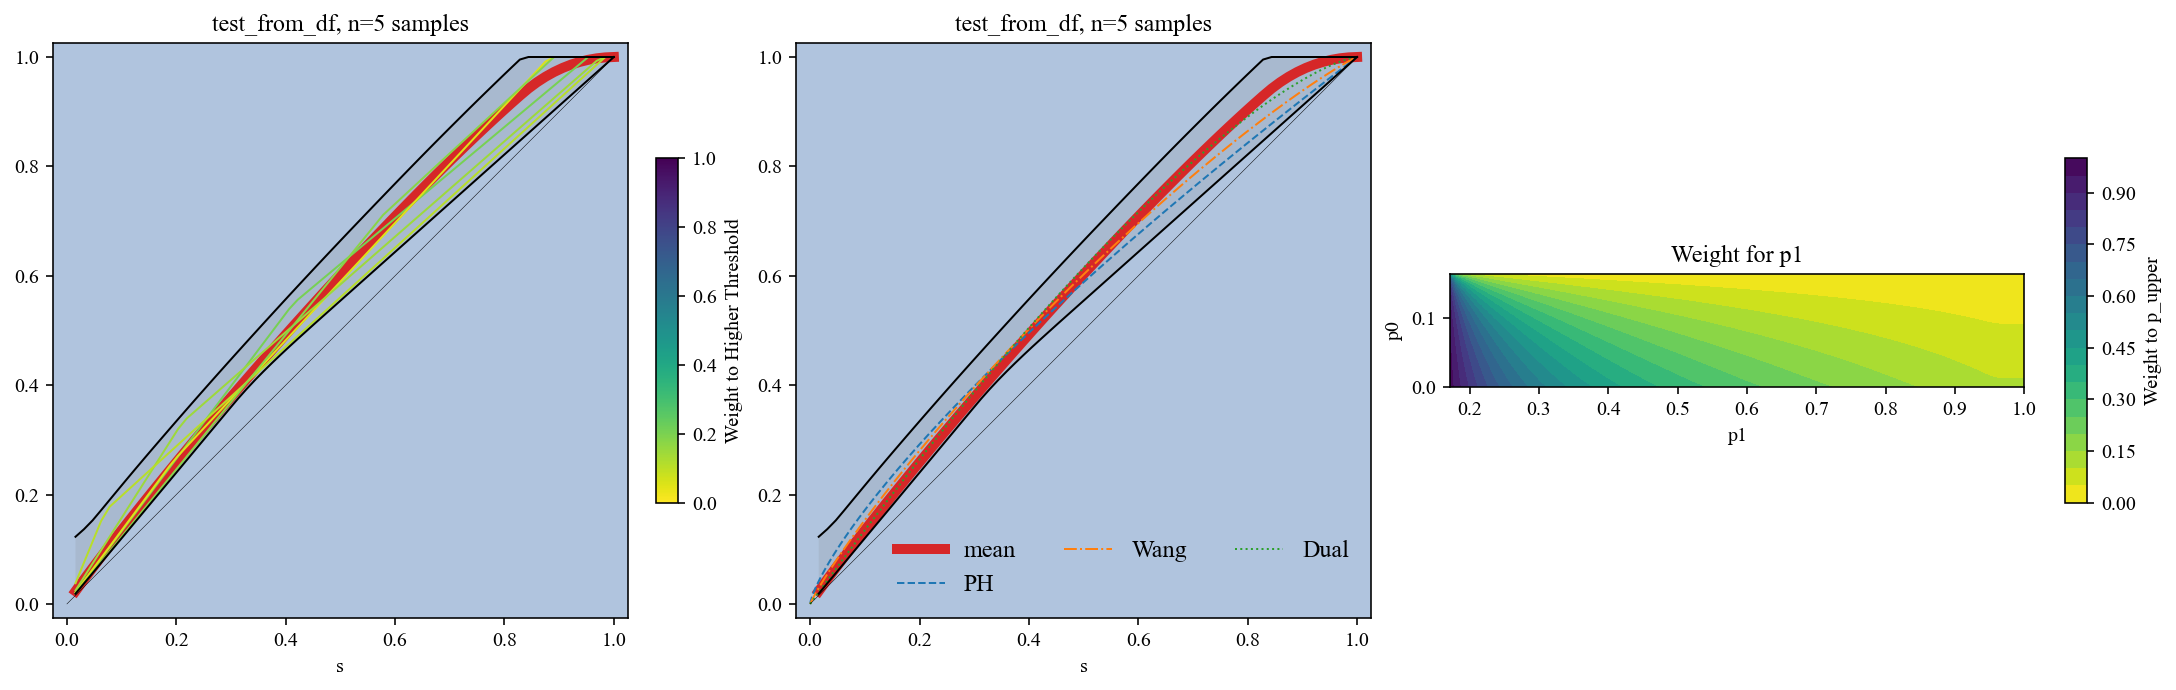

time: 636 ms


In [71]:
%%sf 1 3 5 5
dns = {k:v for k, v in port.dists.items() if k in ['ph', 'wang', 'dual']}
sm.plot(ax=ax0, c='C3', lw=5, label='mean')
sm.plot(ax=ax1, c='C3', lw=5, label='mean')
bd.cloud_view(axs.flatten(), n_resamples=5, distortions=dns, title=port.name, alpha=1, pricing=False, check=False)
sm = bd.cloud_df.mean(axis=1)
bd.weight_image(ax2)

In [65]:
ans = {}
for c in a:
    s = a[c]
    mn = np.array(s.idxmin()) * 128
    mx = np.array(s.idxmax()) * 128
    ans[c] = np.hstack((mn, mx))
print(p_star * 128)
bit = pd.DataFrame(ans.values(), index=ans.keys(), columns=['mn_l', 'mn_u', 'mx_l', 'mx_u'])
bit

21.367710272046477


,mn_l,mn_u,mx_l,mx_u
alloc_A,0.000,119.000,0.000,128.000
alloc_B,0.000,116.000,0.000,128.000
alloc_C,0.000,116.000,0.000,128.000
alloc_D,0.000,109.000,0.000,128.000
alloc_E,0.000,48.000,0.000,128.000
alloc_F,16.000,32.000,0.000,128.000
alloc_G,20.000,23.000,0.000,128.000
alloc_H,21.000,23.000,0.000,128.000


time: 12.7 ms


In [168]:
res.port.dists.keys()

dict_keys(['ph', 'wang', 'cll', 'lep', 'ly', 'clin', 'dual', 'ccoc', 'tvar', 'wtdtvar'])

time: 3.01 ms


In [68]:
bd.cloud_df

time: 1e+03 µs


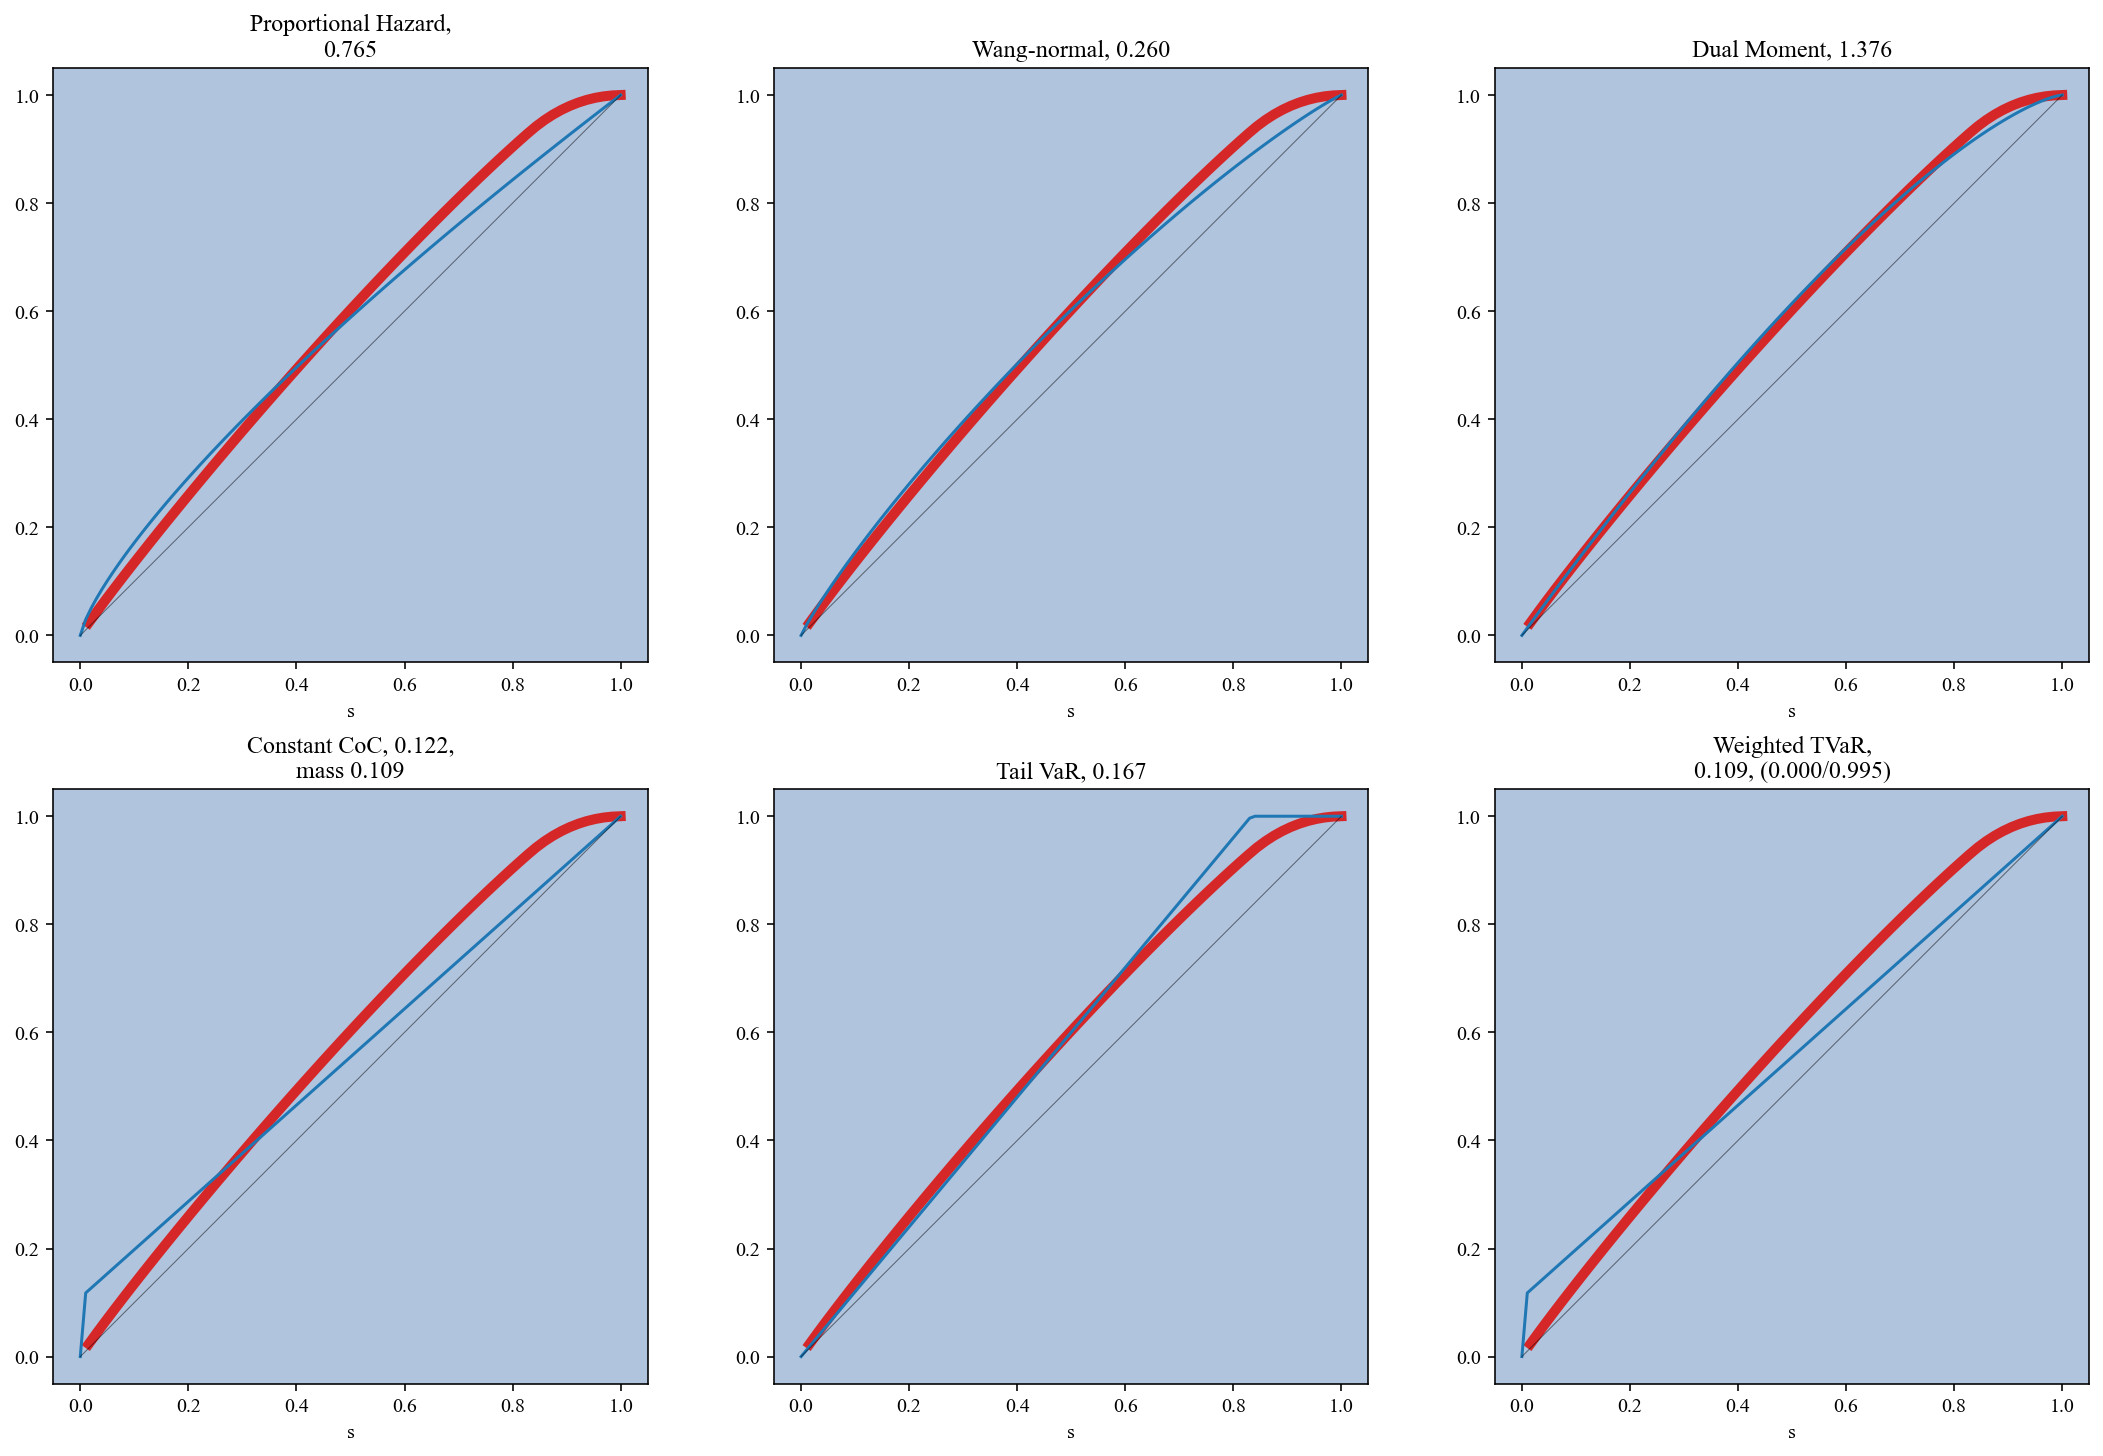

time: 644 ms


In [72]:
%%sf 2 3  5 5
sm = bd.cloud_df.mean(axis=1)
for ax, (k, v) in zip(axs.flat, {k: v for k, v in res.port.dists.items() if k in ['ph', 'wang', 'dual', 'ccoc', 'tvar', 'wtdtvar']}.items() ):
    sm.plot(ax=ax, c='C3', lw=5)
    v.plot(ax=ax, both=False)


In [75]:
a

alloc_A  alloc_B  alloc_C  alloc_D  alloc_E  alloc_F  \
p_lower  p_upper                                                          
0.000    171.875m  102.120  104.211  104.680  105.381  106.607  109.683   
         179.688m  102.114  104.223  104.671  105.377  106.586  109.697   
         187.500m  102.108  104.207  104.659  105.372  106.589  109.701   
         195.312m  102.101  104.182  104.643  105.365  106.598  109.699   
         203.125m  102.097  104.170  104.626  105.357  106.595  109.696   
...                    ...      ...      ...      ...      ...      ...   
164.062m 968.750m  102.128  104.219  104.676  105.397  106.626  109.719   
         976.562m  102.129  104.221  104.679  105.402  106.636  109.731   
         984.375m  102.132  104.222  104.682  105.409  106.652  109.745   
         992.188m  102.135  104.229  104.692  105.422  106.677  109.781   
         1.000     102.140  104.276  104.764  105.559  106.814  110.134   

                   alloc_G  alloc_H  
p_lower  p_upper                     
0.000    171.875m  110.218   57.019  
         179.688m  110.226   57.037  
         187.500m  110.243   57.065  
         195.312m  110.268   57.102  
         203.125m  110.290   57.140  
...                    ...      ...  
164.062m 968.750m  110.299   57.153  
         976.562m  110.323   57.194  
         984.375m  110.360   57.253  
         992.188m  110.418   57.360  
         1.000     110.732   57.830  

[2354 rows x 8 columns]

time: 18.8 ms


Line: alloc_A, min 101.696, max 102.537, mid-target 102.117, prop = 19.7%


t_lower  t_upper    weight    alloc
p_lower  p_upper                                      
0.000    171.875m  744.986  794.784  972.885m  102.120
         992.188m  744.986   1.190k  108.867m  102.235
         1.000     744.986   1.190k  108.867m  102.537
7.812m   171.875m  747.873  794.784  971.217m  102.120
         992.188m  747.873   1.190k  103.049m  102.247
...                    ...      ...       ...      ...
164.062m 968.750m  792.648   1.190k    1.977m  102.128
         976.562m  792.648   1.190k    1.977m  102.129
         984.375m  792.648   1.190k    1.977m  102.132
         992.188m  792.648   1.190k    1.977m  102.135
         1.000     792.648   1.190k    1.977m  102.140

[463 rows x 4 columns]

Line: alloc_B, min 103.333, max 106.806, mid-target 105.070, prop = 0.6%


,,t_lower,t_upper,weight,alloc
p_lower,p_upper,,,,
0.000,1.000,744.986,1.190k,108.867m,106.806
7.812m,1.000,747.873,1.190k,103.049m,106.699
15.625m,1.000,750.449,1.190k,97.792m,106.598
23.438m,1.000,752.923,1.190k,92.686m,106.481
31.250m,1.000,755.330,1.190k,87.660m,106.359
39.062m,1.000,757.688,1.190k,82.685m,106.249
46.875m,1.000,760.002,1.190k,77.749m,106.127
54.688m,1.000,762.289,1.190k,72.817m,106.006
62.500m,1.000,764.550,1.190k,67.889m,105.871


Line: alloc_C, min 103.854, max 109.038, mid-target 106.446, prop = 0.6%


,,t_lower,t_upper,weight,alloc
p_lower,p_upper,,,,
0.000,1.000,744.986,1.190k,108.867m,109.038
7.812m,1.000,747.873,1.190k,103.049m,108.831
15.625m,1.000,750.449,1.190k,97.792m,108.635
23.438m,1.000,752.923,1.190k,92.686m,108.436
31.250m,1.000,755.330,1.190k,87.660m,108.239
39.062m,1.000,757.688,1.190k,82.685m,108.045
46.875m,1.000,760.002,1.190k,77.749m,107.842
54.688m,1.000,762.289,1.190k,72.817m,107.651
62.500m,1.000,764.550,1.190k,67.889m,107.452


Line: alloc_D, min 104.840, max 114.460, mid-target 109.650, prop = 0.5%


,,t_lower,t_upper,weight,alloc
p_lower,p_upper,,,,
0.000,1.000,744.986,1.190k,108.867m,114.460
7.812m,1.000,747.873,1.190k,103.049m,113.994
15.625m,1.000,750.449,1.190k,97.792m,113.571
23.438m,1.000,752.923,1.190k,92.686m,113.159
31.250m,1.000,755.330,1.190k,87.660m,112.750
39.062m,1.000,757.688,1.190k,82.685m,112.340
46.875m,1.000,760.002,1.190k,77.749m,111.938
54.688m,1.000,762.289,1.190k,72.817m,111.531
62.500m,1.000,764.550,1.190k,67.889m,111.123


Line: alloc_E, min 106.549, max 118.445, mid-target 112.497, prop = 0.5%


,,t_lower,t_upper,weight,alloc
p_lower,p_upper,,,,
0.000,1.000,744.986,1.190k,108.867m,118.445
7.812m,1.000,747.873,1.190k,103.049m,117.814
15.625m,1.000,750.449,1.190k,97.792m,117.235
23.438m,1.000,752.923,1.190k,92.686m,116.683
31.250m,1.000,755.330,1.190k,87.660m,116.143
39.062m,1.000,757.688,1.190k,82.685m,115.601
46.875m,1.000,760.002,1.190k,77.749m,115.067
54.688m,1.000,762.289,1.190k,72.817m,114.539
62.500m,1.000,764.550,1.190k,67.889m,114.020


Line: alloc_F, min 109.659, max 134.712, mid-target 122.185, prop = 0.5%


,,t_lower,t_upper,weight,alloc
p_lower,p_upper,,,,
0.000,1.000,744.986,1.190k,108.867m,134.712
7.812m,1.000,747.873,1.190k,103.049m,133.356
15.625m,1.000,750.449,1.190k,97.792m,132.135
23.438m,1.000,752.923,1.190k,92.686m,130.949
31.250m,1.000,755.330,1.190k,87.660m,129.784
39.062m,1.000,757.688,1.190k,82.685m,128.634
46.875m,1.000,760.002,1.190k,77.749m,127.491
54.688m,1.000,762.289,1.190k,72.817m,126.355
62.500m,1.000,764.550,1.190k,67.889m,125.214


Line: alloc_G, min 110.205, max 139.369, mid-target 124.787, prop = 0.5%


,,t_lower,t_upper,weight,alloc
p_lower,p_upper,,,,
0.000,1.000,744.986,1.190k,108.867m,139.369
7.812m,1.000,747.873,1.190k,103.049m,137.776
15.625m,1.000,750.449,1.190k,97.792m,136.347
23.438m,1.000,752.923,1.190k,92.686m,134.971
31.250m,1.000,755.330,1.190k,87.660m,133.620
39.062m,1.000,757.688,1.190k,82.685m,132.280
46.875m,1.000,760.002,1.190k,77.749m,130.961
54.688m,1.000,762.289,1.190k,72.817m,129.629
62.500m,1.000,764.550,1.190k,67.889m,128.312


Line: alloc_H, min 56.994, max 103.624, mid-target 80.309, prop = 0.5%


,,t_lower,t_upper,weight,alloc
p_lower,p_upper,,,,
0.000,1.000,744.986,1.190k,108.867m,103.624
7.812m,1.000,747.873,1.190k,103.049m,101.070
15.625m,1.000,750.449,1.190k,97.792m,98.784
23.438m,1.000,752.923,1.190k,92.686m,96.570
31.250m,1.000,755.330,1.190k,87.660m,94.400
39.062m,1.000,757.688,1.190k,82.685m,92.252
46.875m,1.000,760.002,1.190k,77.749m,90.125
54.688m,1.000,762.289,1.190k,72.817m,88.006
62.500m,1.000,764.550,1.190k,67.889m,85.892


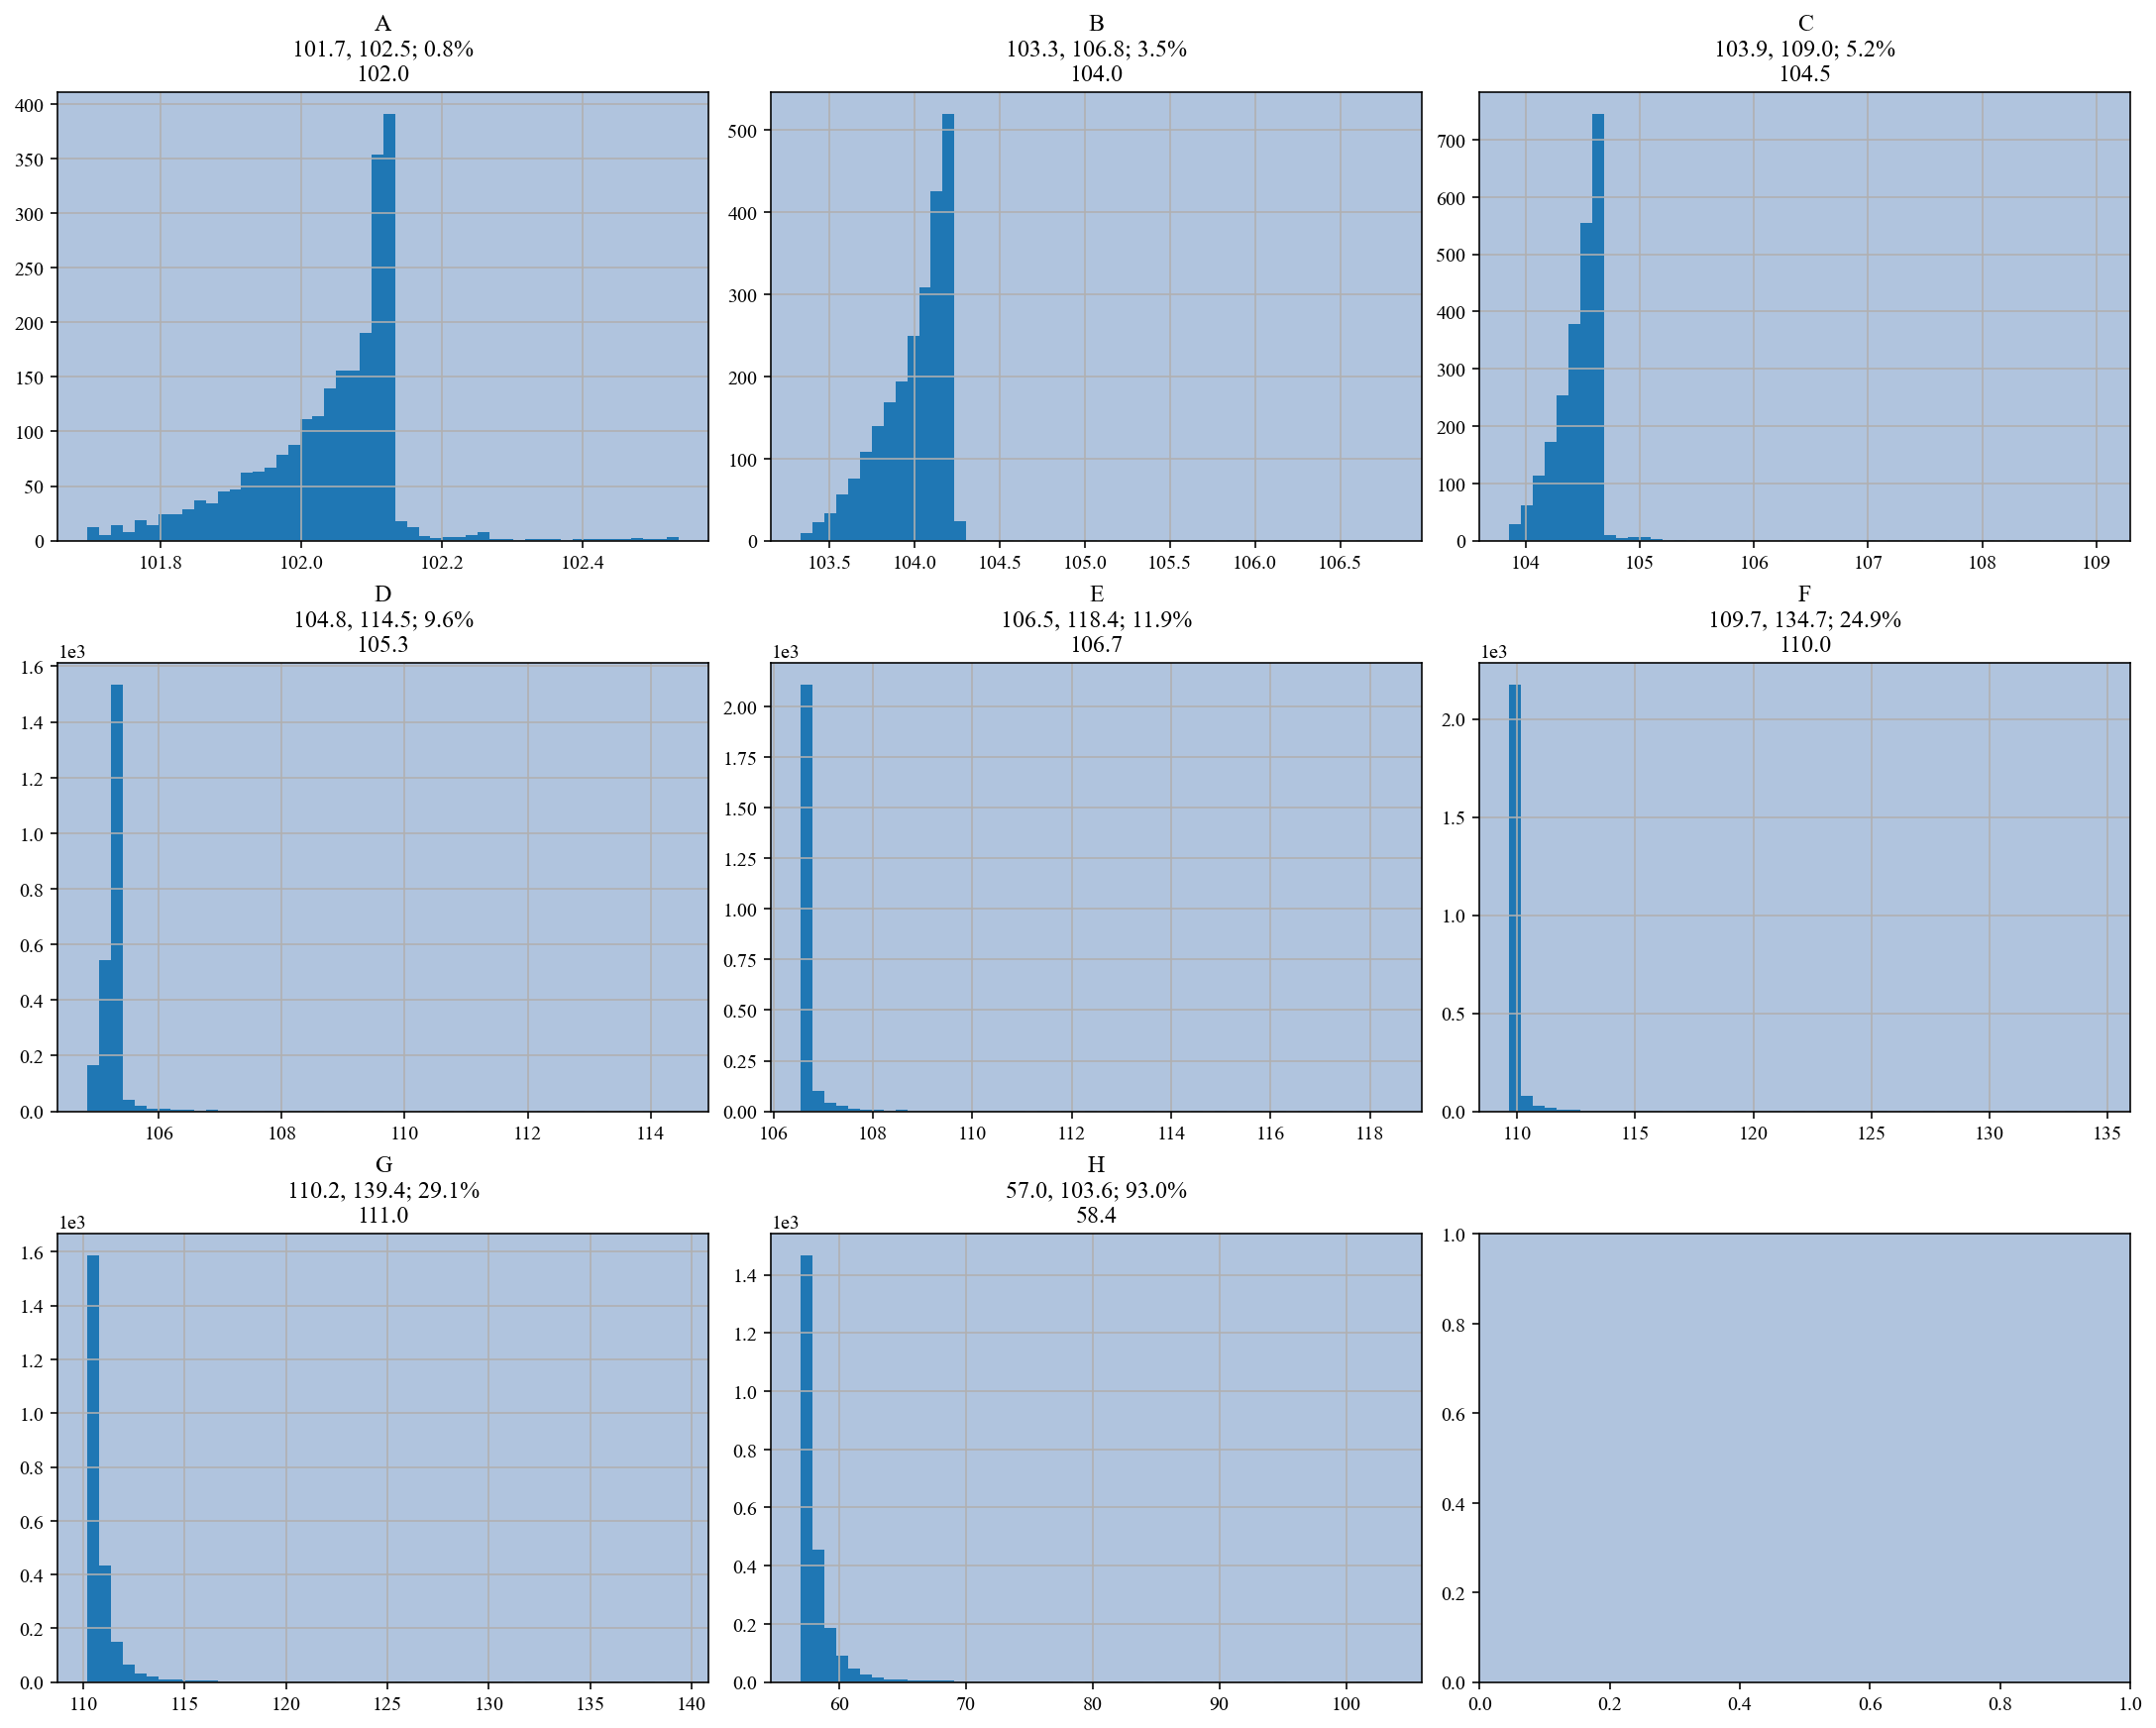

time: 2.01 s


In [86]:
%%sf 3 3 5 4

ans = {}

for ax, c, m in zip(axs.flat, a, res.sample.mean()[1:]):
    if c.find('total') > 0:
        ax.remove()
        break
    a[[c]].hist(bins=50, ax=ax)

    bd.weight_df[['alloc']] = a[[c]]

    mx = bd.weight_df[['alloc']].max()
    mx = float(mx)
    mn = bd.weight_df[['alloc']].min()
    mn = float(mn)
    
    ax.set(title=c[-1] + f'\n{mn:.1f}, {mx:.1f}; {(mx-mn)/m:.1%}\n{float(a[c].mean()):,.1f}')
    
    tg = 0.5 * mx + 0.5 * mn
    ext = bd.weight_df.query('alloc > @tg')
    print(f'Line: {c}, min {mn:.3f}, max {mx:.3f}, mid-target {tg:.3f}, prop = {len(ext)/len(bd.weight_df):.1%}')
    display(ext)

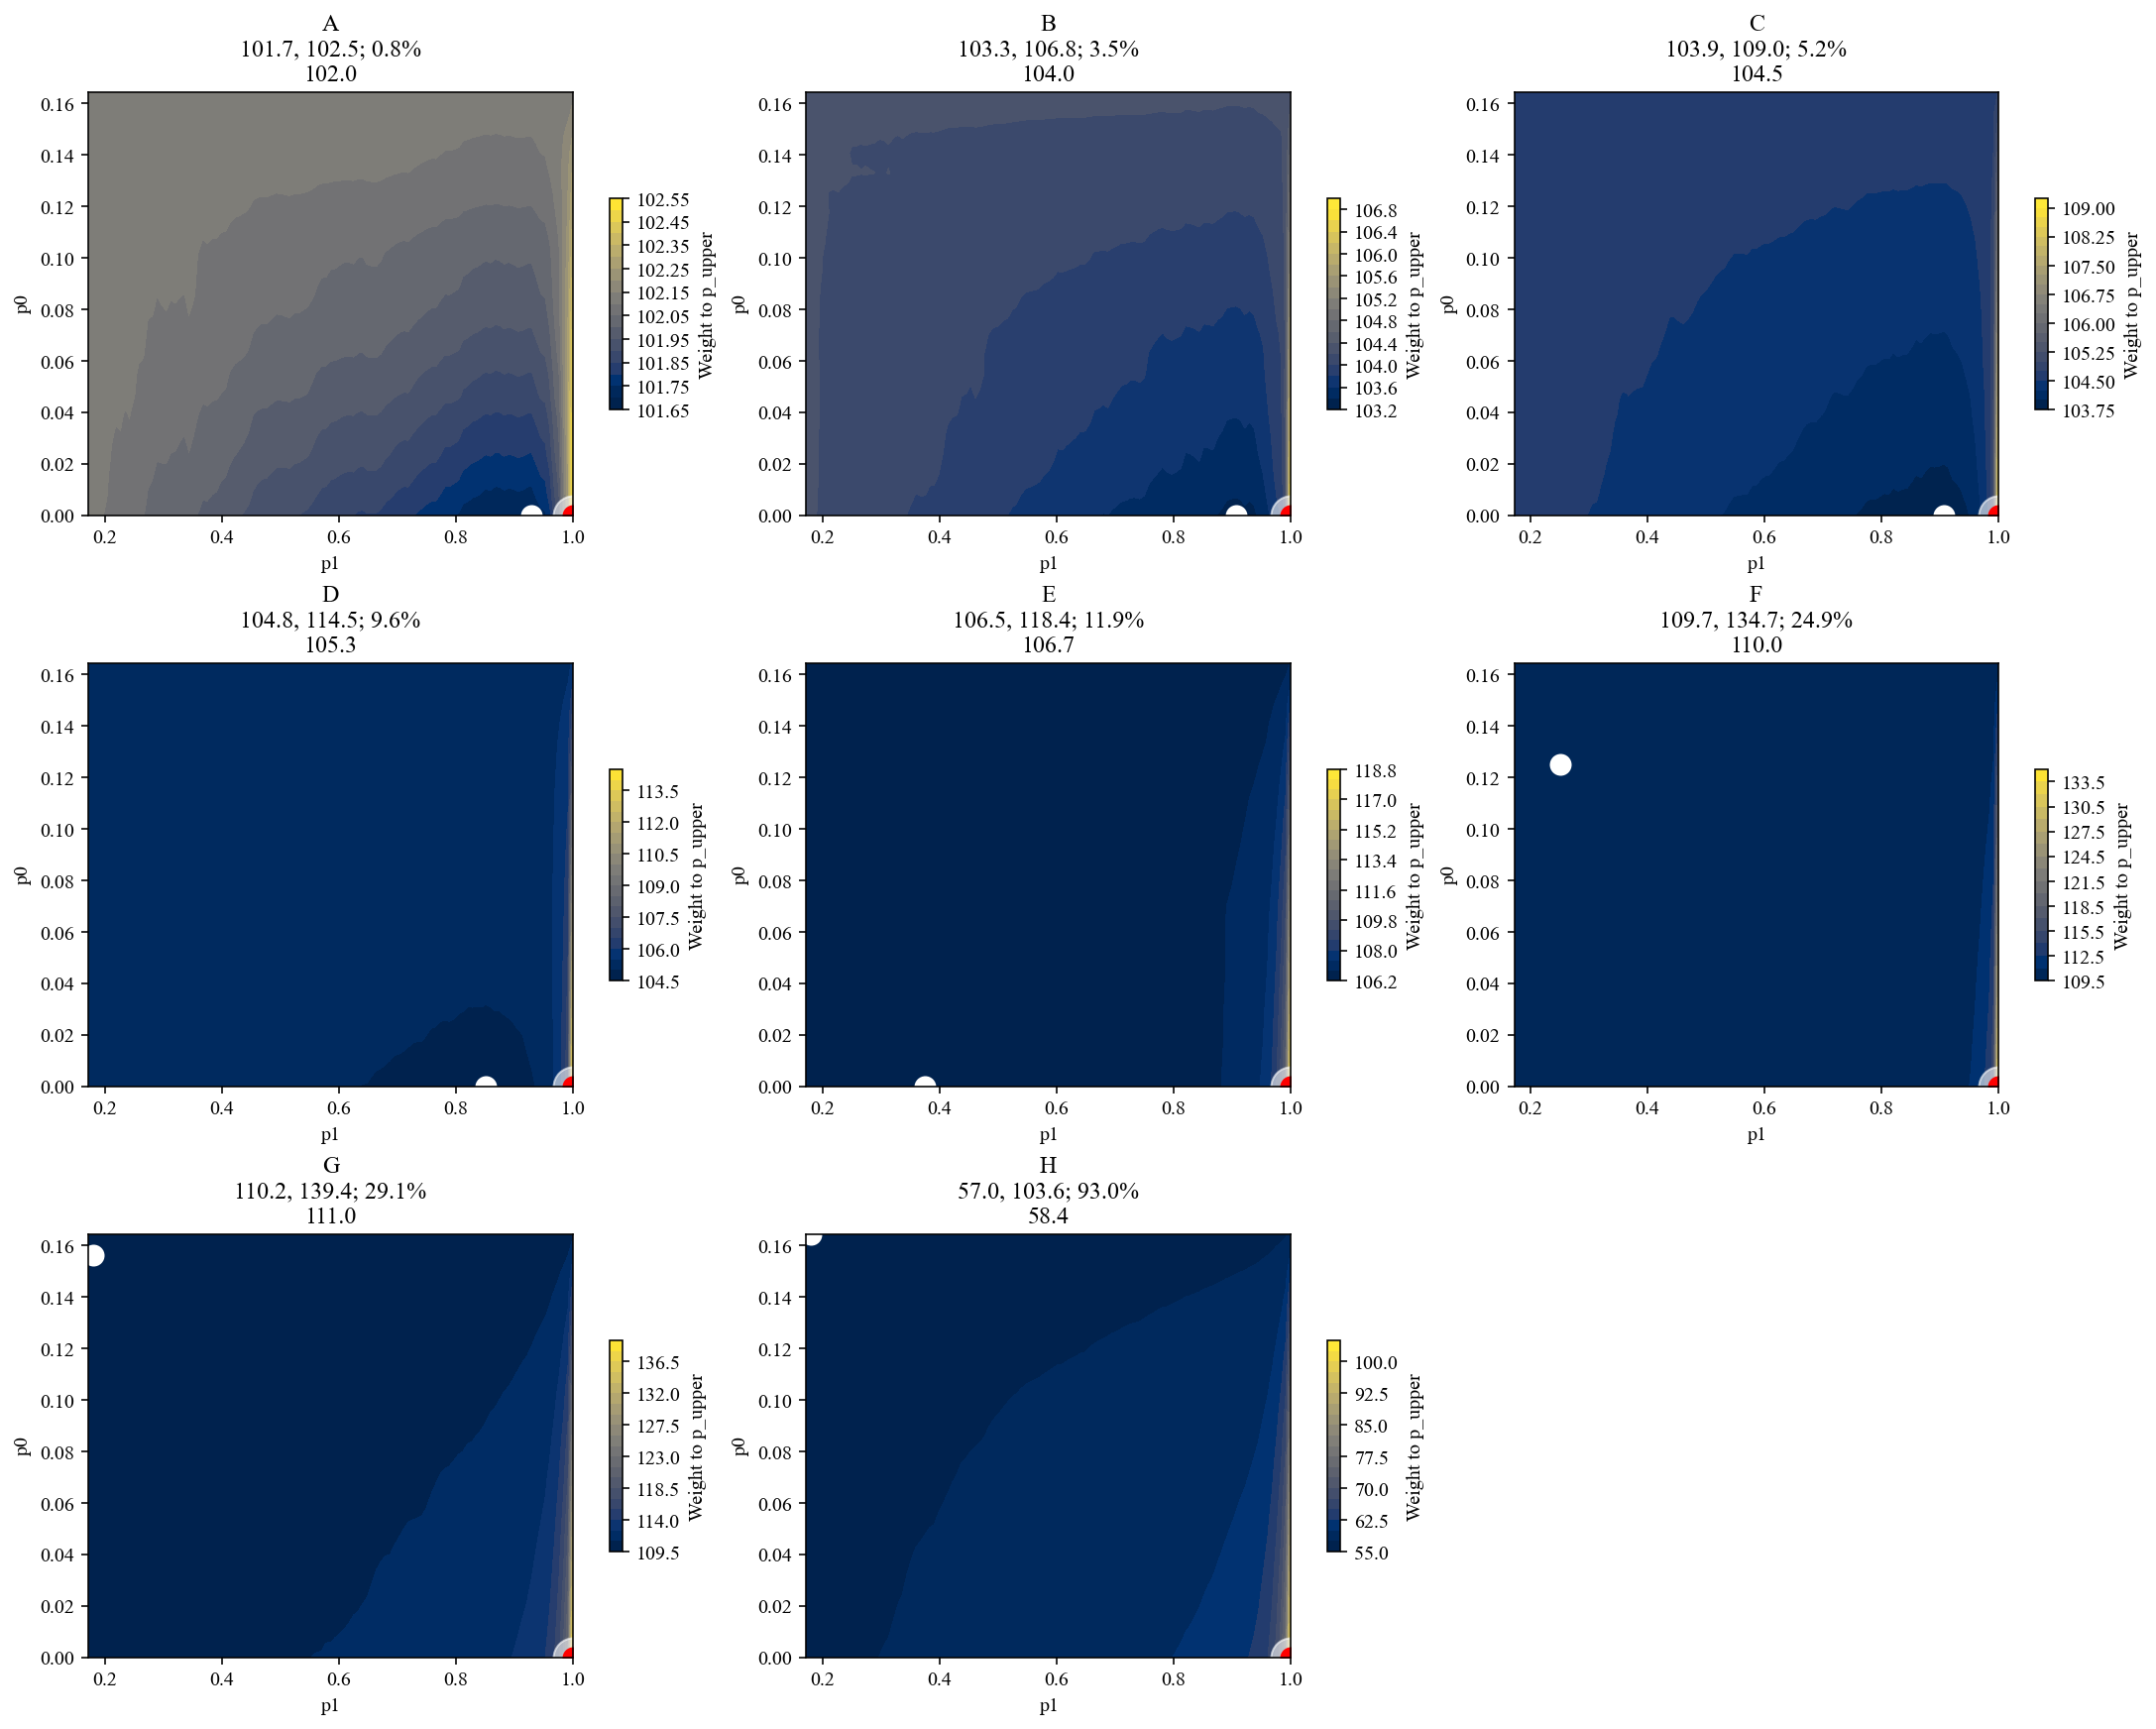

time: 2.28 s


In [74]:
%%sf 3 3 5 4

ans = {}

for ax, c, m in zip(axs.flat, a, res.sample.mean()[1:]):
    if c[0] == 'total':
        ax.remove()
        break
    
    bd.weight_df[['alloc']] = a[[c]]

    mx = bd.weight_df[['alloc']].max()
    mx = float(mx)
    mn = bd.weight_df[['alloc']].min()
    mn = float(mn)
    
    bit = bd.weight_df[['alloc']].unstack(1).droplevel(0, axis=1)
    img = ax.contourf(bit.columns, bit.index, bit, cmap='cividis', levels=20, vmin=mn, vmax=mx)
    f.colorbar(img, ax=ax, shrink=.5, aspect=16, label='Weight to p_upper')

    x = bd.weight_df.query('alloc == @mx')
    p0, p1 = x.index[0]
    ax.plot(p1, p0, 'wo', ms=20, alpha=.6)
    ax.plot(p1, p0, 'ro', ms=10)

    x = bd.weight_df.query('alloc == @mn')
    p0, p1 = x.index[0]
    ax.plot(p1, p0, 'wo', ms=10)
    m = float(m)
    ans[c[0]] = float(a[c].mean())
    ax.set(xlabel='p1', ylabel='p0', title=c[-1] + f'\n{mn:.1f}, {mx:.1f}; {(mx-mn)/m:.1%}\n{float(a[c].mean()):,.1f}', 
           aspect='equal')
    
axs.flat[-1].remove()

## Samples and agg specified marginals; resampling 

In [1]:
import aggregate as agg
from aggregate import build
import scipy.stats as ss
from pandas.plotting import scatter_matrix
import samples as sam

time: 722 ms


Parser debugging for UnderwritingParser written to C:\Users\steve\aggregate\parser\parser.out


In [2]:
cnc = build('''
port cnc_case
    agg A 1 claim sev gamma 80 cv 0.15 fixed
    agg B 1 claim sev lognorm 20 cv 1. fixed
''', log2=16)

time: 794 ms


In [3]:
rho = 0.5
desired_correlation = np.array([[1., rho], [rho, 1.]])
desired_correlation

array([[         1,        0.5],
       [       0.5,          1]])

time: 8.68 ms


In [4]:
sample = sam.resample(cnc, 10000, desired_correlation)

time: 1.02 s


In [5]:
sample.head()

,A,B
total,,
427.883,115.055,312.828
375.062,97.414,277.648
353.055,95.727,257.328
338.039,113.969,224.070
323.273,118.359,204.914


time: 8.85 ms


In [6]:
sample.corr()

,A,B
A,1.000,431.249m
B,431.249m,1.000


time: 6.64 ms


In [7]:
cnc.line_name_pipe

'A|B|total'

time: 3.51 ms


In [16]:
sample.head()

,A,B
total,,
427.883,115.055,312.828
375.062,97.414,277.648
353.055,95.727,257.328
338.039,113.969,224.070
323.273,118.359,204.914


time: 7.81 ms


In [28]:
t = [1,2,3]
t.remove(3)
t

[1, 2]

time: 3.32 ms


In [36]:
df_exa = sam.adjust_exa(cnc, sample)

Adding p_total to sample_in
time: 152 ms


<AxesSubplot:>

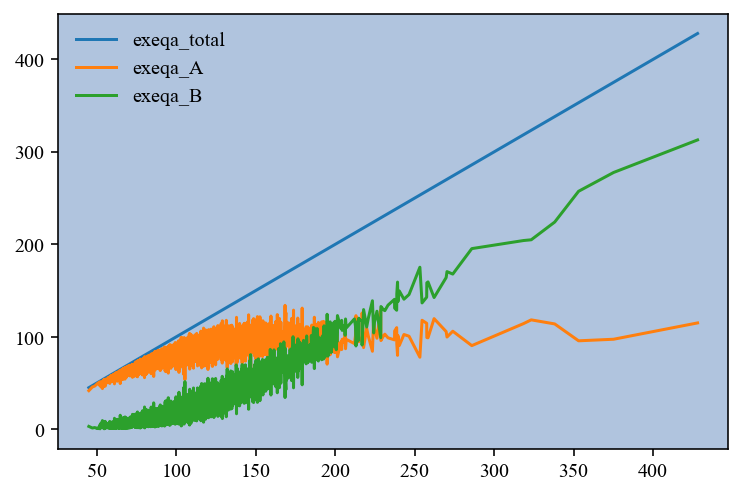

time: 145 ms


In [39]:
df_exa.query('p_total >0').filter(regex='exeqa_').plot()

In [40]:
com = agg.random_corr_matrix(8, .6, True)
com

matrix([[         1,    0.82557,    0.49089,    0.92688,    0.72694,    0.76473,    0.98261,    0.80259],
        [   0.82557,          1,    0.67016,     0.7844,    0.83869,    0.80744,    0.88106,    0.98504],
        [   0.49089,    0.67016,          1,    0.61925,    0.84606,    0.91313,    0.61773,    0.78007],
        [   0.92688,     0.7844,    0.61925,          1,    0.87864,    0.84723,    0.95314,    0.81293],
        [   0.72694,    0.83869,    0.84606,    0.87864,          1,    0.93826,     0.8344,    0.91045],
        [   0.76473,    0.80744,    0.91313,    0.84723,    0.93826,          1,    0.86159,    0.88482],
        [   0.98261,    0.88106,    0.61773,    0.95314,     0.8344,    0.86159,          1,    0.88078],
        [   0.80259,    0.98504,    0.78007,    0.81293,    0.91045,    0.88482,    0.88078,          1]])

time: 3 ms


In [205]:
res = sam.portfolio_from_sample(100000, [100]*8, np.linspace(.125, 2, 8), plot=False)

,A,B,C,D,E,F,G,H
A,1.000,742.406m,74.431m,38.482m,4.486m,288.779m,225.767m,311.837m
B,742.406m,1.000,100.978m,549.088m,283.788m,380.497m,416.846m,694.775m
C,74.431m,100.978m,1.000,81.165m,387.564m,534.608m,58.849m,206.794m
D,38.482m,549.088m,81.165m,1.000,638.421m,385.551m,605.289m,681.033m
E,4.486m,283.788m,387.564m,638.421m,1.000,674.199m,620.874m,443.720m
F,288.779m,380.497m,534.608m,385.551m,674.199m,1.000,672.395m,469.134m
G,225.767m,416.846m,58.849m,605.289m,620.874m,672.395m,1.000,492.853m
H,311.837m,694.775m,206.794m,681.033m,443.720m,469.134m,492.853m,1.000


,total,A,B,C,D,E,F,G,H
count,100.000k,100.000k,100.000k,100.000k,100.000k,100.000k,100.000k,100.000k,100.000k
mean,800.898,100.012,99.918,99.719,100.258,100.235,100.317,100.318,100.120
std,639.516,12.428,39.251,65.333,92.774,119.498,148.545,167.892,199.771
min,129.921,57.617,19.168,6.855,2.375,1.046,159.349m,334.779m,193.486m
10%,334.444,84.707,57.177,38.525,26.805,19.107,14.435,11.187,8.906
25%,437.916,91.288,72.072,55.551,43.215,33.974,27.539,22.912,19.043
50%,620.986,99.241,92.855,83.327,73.571,63.995,56.236,50.357,44.675
75%,936.658,107.833,120.249,124.918,125.138,121.160,115.709,111.323,105.901
90%,1.437k,116.380,151.344,180.183,200.269,215.418,221.974,227.170,227.540
95%,1.890k,121.637,173.738,223.339,268.388,304.968,327.760,349.170,360.178


39:37.646|2189|WARNING   | aggregate.port, add_exa|  Portfolio.add_exa | p_total has a negative value starting at             loss       p_A       p_B      p_C      p_D       p_E      p_F  \
26.339k  26.339k -364.375z  117.355z -91.949z   3.391z -108.937z   7.820z   
26.360k  26.360k  -46.006z -108.239z -98.709z -76.940z  -13.999z -12.404z   
26.362k  26.362k  -74.141z  -36.420z -18.798z  22.623z  -18.489z -57.956z   
26.368k  26.368k  -48.079z   15.250z   5.068z  -3.440z    2.518z  19.949z   
26.369k  26.369k  176.843z   -3.845z -39.562z -32.128z   28.511z  42.573z   

             p_G      p_H  p_total     ημ_A     ημ_B     ημ_C      ημ_D  \
26.339k -53.436z   4.260z  -2.575z -10.729z  -8.403z  12.154z   21.345z   
26.360k -57.436z -33.311z  -5.005z  -8.312z  -7.700z -16.148z   20.959z   
26.362k -35.026z -12.494z  -6.693z  11.227z -47.376z  19.715z   12.708z   
26.368k -38.685z  35.995z -19.365z  -2.457z -72.137z -12.275z   -1.530z   
26.369k  43.868z  39.561z -15.814z   8.094z -43.

Adding p_total to sample_in
time: 12 s


In [214]:
res.sample.total.std() / res.sample.total.mean()

0.7984983820262234

time: 5 ms


In [206]:
res.port

,A,B,C,D,E,F,G,H,total
"(freq, mean)",1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,8.000
"(sev, mean)",100.012,99.918,99.719,100.258,100.235,100.317,100.318,100.120,100.112
"(agg, mean)",100.012,99.918,99.719,100.258,100.235,100.317,100.318,100.120,800.898
"(freq, cv)",0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
"(sev, cv)",124.263m,392.828m,655.168m,925.347m,1.192,1.481,1.674,1.995,1.218
"(agg, cv)",124.263m,392.828m,655.168m,925.347m,1.192,1.481,1.674,1.995,430.741m
"(freq, skew)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(sev, skew)",370.135m,1.221,2.204,3.510,4.849,7.501,7.944,11.897,11.631
"(agg, skew)",370.135m,1.221,2.204,3.510,4.849,7.501,7.944,11.897,4.111
Mean,100.012,99.918,99.719,100.258,100.235,100.317,100.318,100.120,800.898


time: 15.8 ms


Adding p_total to sample_in
time: 398 ms


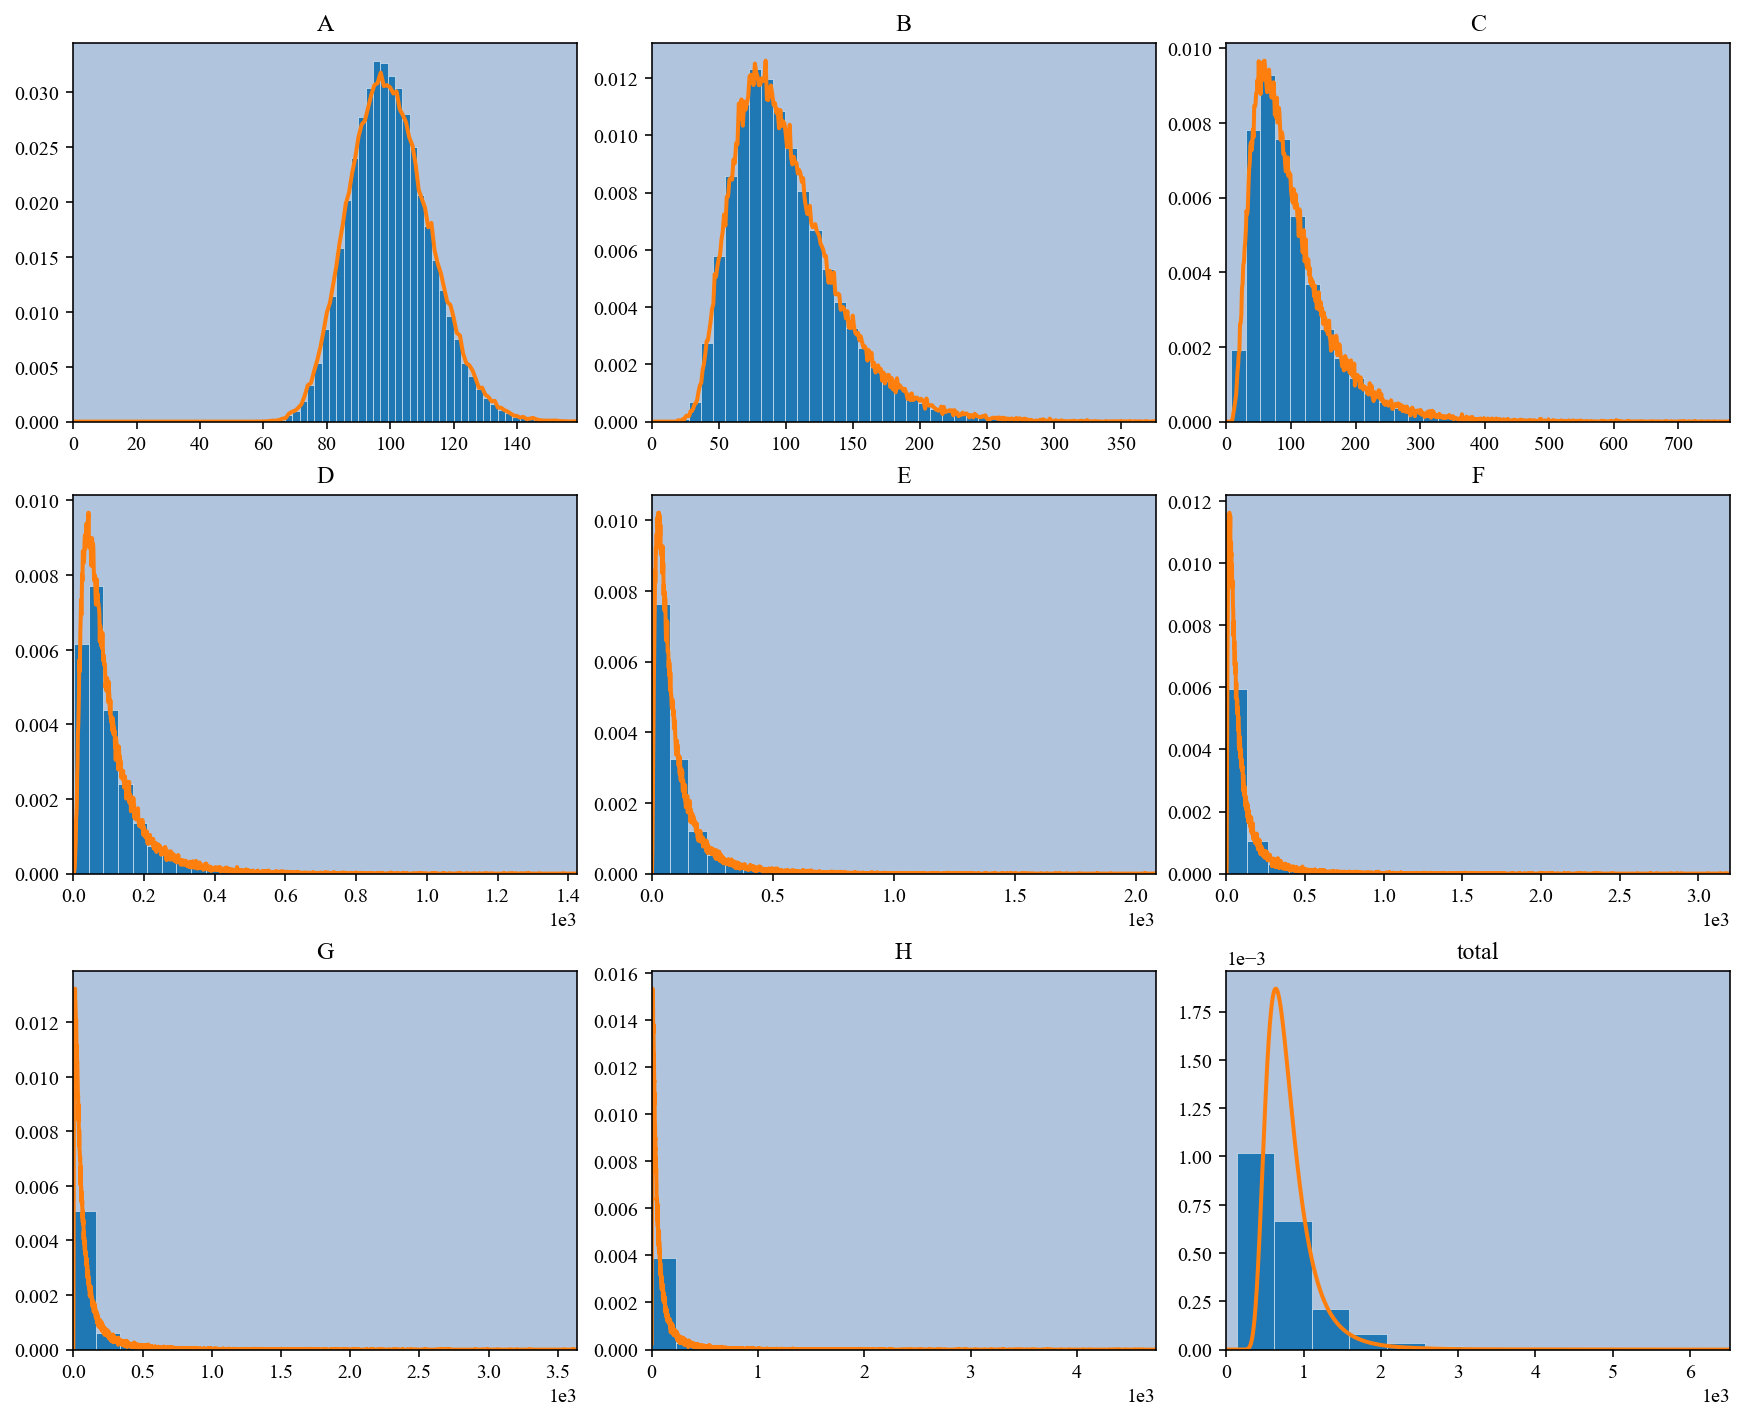

time: 1.66 s


In [216]:
%%sf 3 3 
cnc = res.port 
sample = res.sample 

for ax, c in zip(axs.flat, cnc.line_names):
    sample[c].hist(bins=50, ax=ax, density=True, ec='w', lw=.25)
    (cnc.density_df[f'p_{c}'] / cnc.bs).plot(ax=ax, lw=2, c='C1')
    ax.set(xlim=[0,cnc[c].q(0.9999)], title=c)
    
ax = axs.flat[-1]
sample.reset_index(drop=False).total.hist(bins=50, ax=ax, density=True, ec='w', lw=.25)
(cnc.density_df['p_total'] / cnc.bs).plot(ax=ax, lw=2, c='C1')
ax.set(xlim=[0,cnc.q(0.9999)], title='total'      )

### Bounds etc.

In [217]:
df_adj = sam.adjust_exa(res.port, res.sample)

Adding p_total to sample_in
time: 469 ms


In [218]:
assets = res.sample.sort_values('total').total.iloc[-500]  # res.port.q(0.995)
assets = res.port.snap(assets)
assets

4082.699335391282

time: 27.2 ms


In [219]:
np.mean(np.minimum(assets, res.sample.total)), res.port.ex

(793.2861485381784, 813.5342731834739)

time: 3.39 ms


In [220]:
roe = 0.1
d = roe / (1 + roe) 
v = 1 - d
prem_exact = v * res.port.ex + d * assets
prem = v * np.mean(np.minimum(assets, res.sample.total)) + d * assets
res.port.q(.99), prem, prem_exact

(2056.0, 1092.3237109793697, 1110.7310970205474)

time: 15.6 ms


In [222]:
res.port.snap(assets)

4083.0

time: 5.92 ms


In [223]:
bd, ptot, p_star = sam.create_bounds(res.port, prem, assets)

time: 4.95 s


In [224]:
ptot.query('p_total > 1e-15').iloc[::10]

,p_total,A,B,C,D,E,F,G,H,total
total,,,,,,,,,,
139.000,1.386f,68.520,25.029,14.637,9.082,7.024,5.637,4.830,4.245,139.000
149.000,36.488f,71.163,27.173,15.973,10.200,7.902,6.350,5.441,4.797,149.000
159.000,596.276f,73.589,29.515,17.331,11.314,8.771,7.068,6.058,5.353,159.000
169.000,6.668p,75.814,31.964,18.722,12.439,9.647,7.802,6.690,5.922,169.000
179.000,54.600p,77.861,34.432,20.157,13.590,10.544,8.561,7.345,6.510,179.000
...,...,...,...,...,...,...,...,...,...,...
21.669k,1.149f,100.470,106.368,122.954,211.052,495.631,1.129k,8.023k,11.480k,21.669k
21.679k,1.110f,100.455,106.343,122.826,210.560,498.587,1.146k,8.016k,11.479k,21.679k
21.689k,1.074f,100.438,106.309,122.684,210.092,501.311,1.163k,8.009k,11.477k,21.689k


time: 21.1 ms


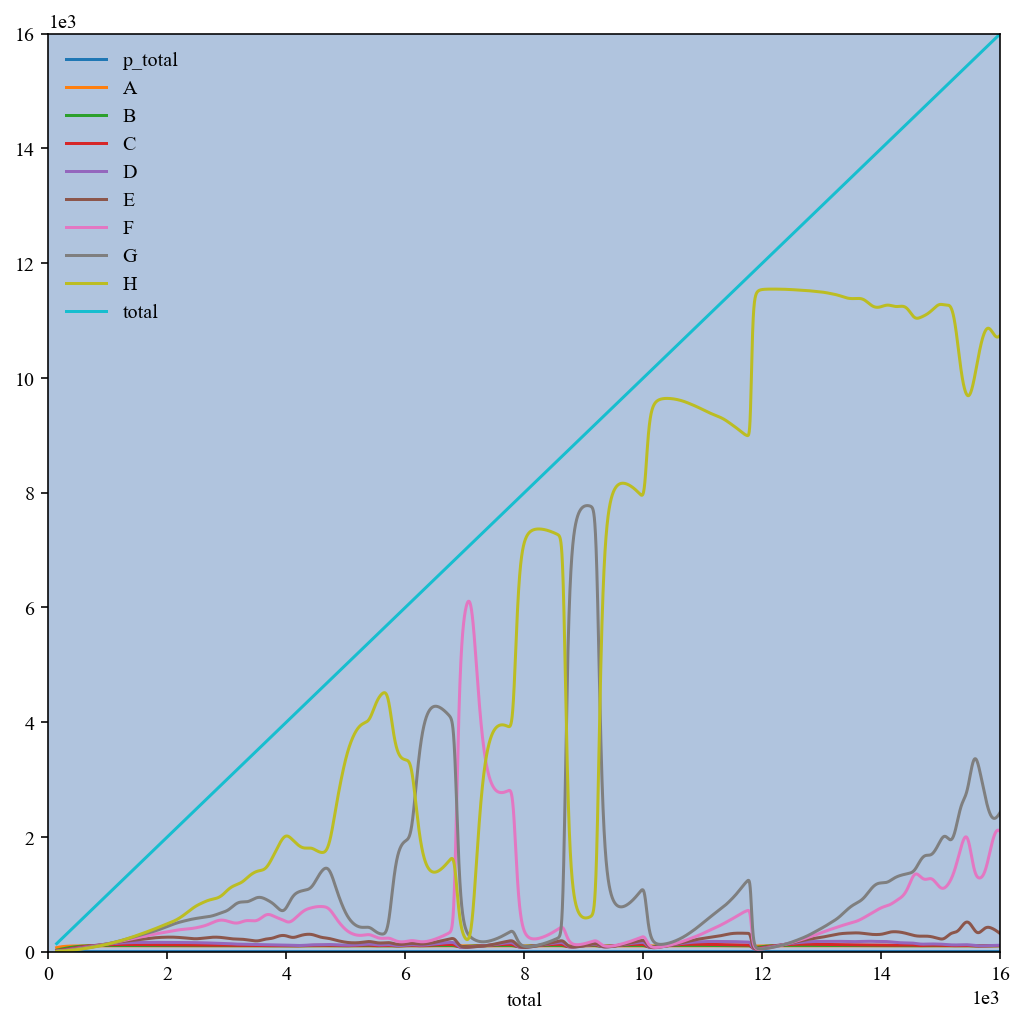

time: 430 ms


In [225]:
%%sf 1 1 7 7
ptot.query('p_total > 1e-15').rolling(1, center=True).mean().plot(xlim=[0, 16000], ylim=[0, 16000], ax=ax)

In [226]:
res.sample

,total,A,B,C,D,E,F,G,H
0,129.921,70.474,19.168,27.037,5.299,4.753,1.588,1.408,193.486m
1,139.524,63.848,25.435,18.883,20.385,8.017,711.115m,1.459,786.057m
2,141.441,77.968,28.608,15.217,7.947,9.604,742.953m,1.084,269.711m
3,142.878,79.600,32.328,21.779,5.196,1.537,1.009,804.298m,625.603m
4,146.906,73.668,30.102,20.965,7.536,10.291,1.664,1.993,686.975m
...,...,...,...,...,...,...,...,...,...
99995,13.442k,108.082,279.846,270.927,1.755k,1.077k,1.113k,1.260k,7.579k
99996,13.931k,106.494,207.908,131.631,1.386k,2.341k,2.614k,5.378k,1.767k
99997,15.136k,133.147,382.363,113.229,932.929,646.998,1.033k,2.166k,9.728k
99998,19.292k,119.311,278.473,118.362,1.705k,2.170k,3.060k,8.352k,3.488k


time: 18.8 ms


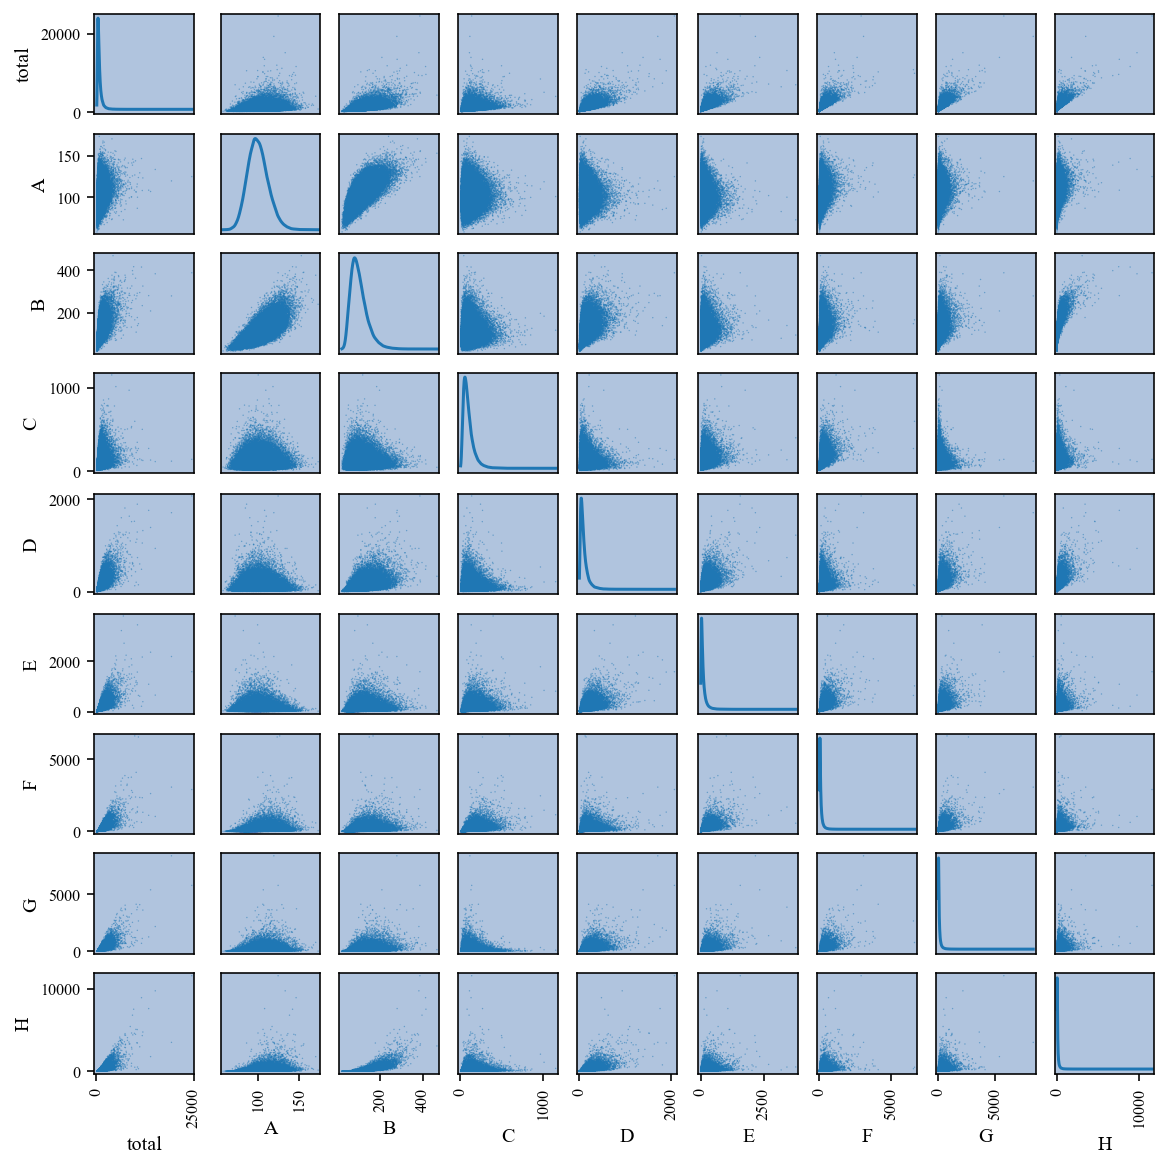

time: 51.1 s


In [227]:
%%sf 1 1 8 8 
scatter_matrix(res.sample, marker='.', s=2, alpha=.5, figsize=(10, 10), diagonal='kde', ax=ax);

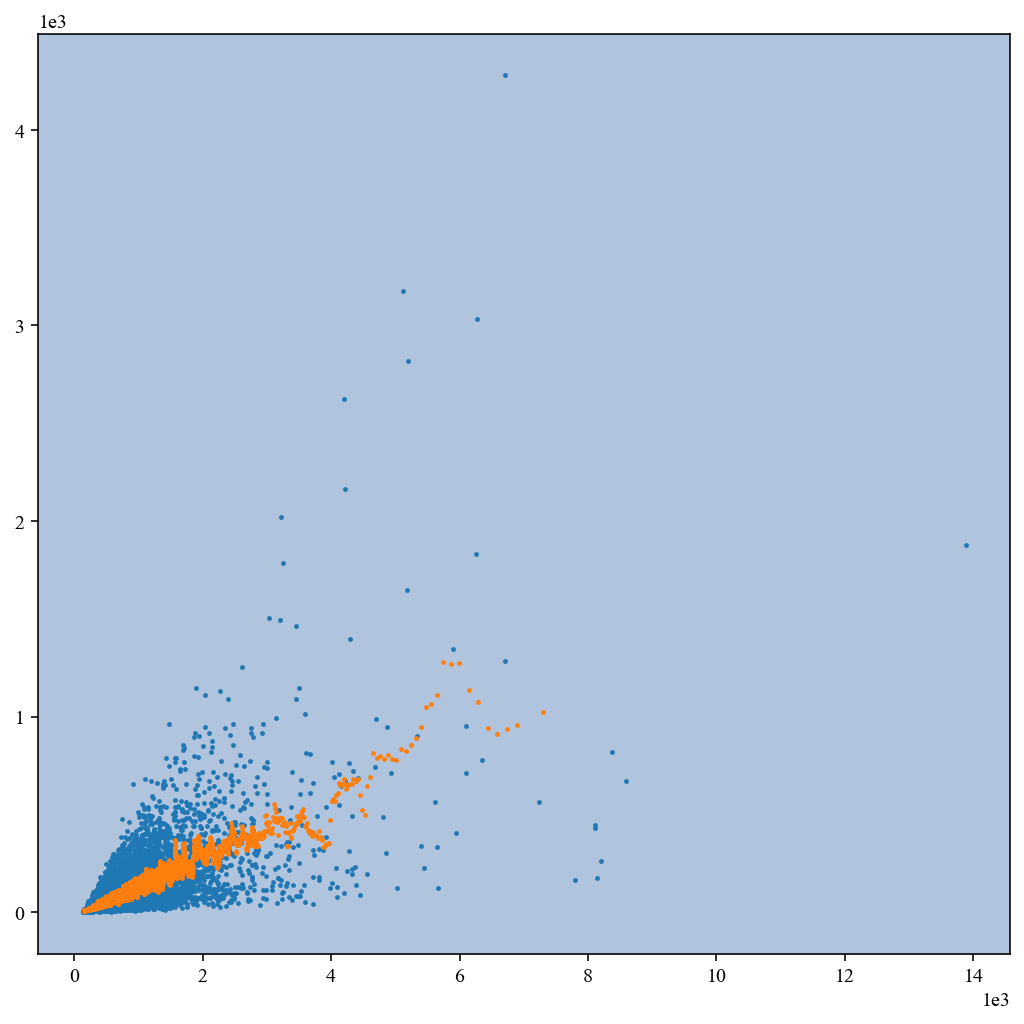

time: 164 ms


In [107]:
%%sf 1 1 7 7 
ax.scatter(res.sample.total, res.sample.F, s=2)
ax.scatter(res.sample.total.rolling(20, center=True).mean(), res.sample.F.rolling(20, center=True).mean(), s=2)

In [247]:
rcm = agg.random_corr_matrix(8, .9)

time: 2.03 ms


In [248]:
sam.resample(res.port, 20, rcm)

,A,B,C,D,E,F,G,H
total,,,,,,,,
2.051k,125.000,136.000,80.000,75.000,126.000,10.000,3.000,1.496k
1.411k,87.000,99.000,135.000,135.000,83.000,658.000,129.000,85.000
1.295k,70.000,55.000,89.000,270.000,9.000,787.000,3.000,12.000
1.025k,88.000,109.000,79.000,164.000,85.000,39.000,67.000,394.000
978.000,126.000,107.000,69.000,21.000,383.000,15.000,12.000,245.000
970.000,85.000,71.000,269.000,274.000,29.000,198.000,6.000,38.000
961.000,125.000,67.000,52.000,57.000,47.000,168.000,417.000,28.000
951.000,121.000,119.000,360.000,82.000,180.000,42.000,18.000,29.000
951.000,103.000,105.000,199.000,94.000,189.000,101.000,105.000,55.000


time: 67.8 ms


In [242]:
res.port.density_df[['loss', 'p_C']].query('p_C>0').sample(10, replace=True, weights='p_C').drop(columns='p_C').reset_index(drop=True)

,loss
0,36.000
1,87.000
2,76.000
3,19.000
4,131.000
5,125.000
6,101.000
7,161.000
8,102.000
9,35.000


time: 13.3 ms


In [228]:
bd.weight_df.head()

t_lower  t_upper    weight
p_lower p_upper                              
0.000   585.938m -821.240m   1.093k  999.809m
        593.750m -821.240m   1.098k  994.592m
        601.562m -821.240m   1.104k  989.324m
        609.375m -821.240m   1.110k  984.002m
        617.188m -821.240m   1.116k  978.625m

time: 9.47 ms


In [229]:
ptot.query('p_total > 1e-5')

,p_total,A,B,C,D,E,F,G,H,total
total,,,,,,,,,,
293.000,10.386u,92.134,59.165,39.137,28.798,22.905,19.233,16.726,14.902,293.000
294.000,10.955u,92.205,59.358,39.313,28.945,23.028,19.341,16.822,14.988,294.000
295.000,11.549u,92.275,59.550,39.489,29.092,23.152,19.449,16.918,15.075,295.000
296.000,12.168u,92.345,59.742,39.666,29.239,23.276,19.557,17.015,15.161,296.000
297.000,12.814u,92.414,59.934,39.842,29.387,23.400,19.665,17.111,15.248,297.000
...,...,...,...,...,...,...,...,...,...,...
2.356k,10.092u,100.507,103.970,112.758,157.665,231.848,396.387,552.119,700.746,2.356k
2.357k,10.071u,100.506,103.966,112.745,157.638,231.740,396.489,552.360,701.556,2.357k
2.358k,10.051u,100.506,103.962,112.731,157.610,231.631,396.592,552.601,702.367,2.358k


time: 20.9 ms


In [230]:
a = sam.allocation_ranges(bd, ptot, a=assets)

time: 4.12 s


In [234]:
res.sample.mean(), res.sample.max(), 

(total    800.898
 A        100.012
 B         99.918
 C         99.719
 D        100.258
 E        100.235
 F        100.317
 G        100.318
 H        100.120
 dtype: float64,
 total    24.503k
 A        173.161
 B        467.247
 C         1.153k
 D         2.067k
 E         3.770k
 F         6.599k
 G         8.352k
 H        11.555k
 dtype: float64)

time: 10.6 ms


In [231]:
d = a.describe(percentiles=(0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99), )
d.loc['cv'] = d.loc['std'] / d.loc['mean']
d.loc['range'] = d.loc['max'] - d.loc['min']
d
# d.loc[['range']].T

,A,B,C,D,E,F,G,H,total
count,4.050k,4.050k,4.050k,4.050k,4.050k,4.050k,4.050k,4.050k,4.050k
mean,100.560,105.202,114.374,128.285,142.748,156.525,167.464,178.283,1.156k
std,863.886m,1.460,3.266,5.023,5.904,7.326,10.058,15.292,518.045
min,73.351,73.535,73.699,74.375,74.686,75.026,75.413,75.685,1.094k
1%,95.783,99.607,103.564,109.546,116.536,120.123,122.937,125.213,1.094k
5%,100.434,103.025,108.100,118.712,134.500,155.997,164.533,171.654,1.094k
10%,100.509,103.749,110.116,122.246,138.308,156.191,164.649,171.858,1.094k
25%,100.611,104.802,113.092,126.829,142.221,156.305,165.149,172.733,1.094k
50%,100.686,105.623,115.435,129.942,144.299,156.623,166.530,175.277,1.095k
75%,100.724,106.068,116.694,131.465,145.128,157.194,169.253,180.742,1.095k


time: 46 ms


In [190]:
prem, assets, roe, assets

(1096.9631023965258, 4199.472411235395, 0.1, 4199.472411235395)

time: 4.42 ms


In [ ]:
# need better calibrate options... need assets... need correlation 

In [191]:
res.port.calibrate_distortions(ROEs=[roe], Ps=[.995], strict=False, df=[25/128, 125/128])

$S$   $\iota$  $\delta$     $\nu$     $EL$  \
$a$    LR       method                                                   
2.426k 842.031m ph       5.000m  100.000m   90.909m  909.091m  791.864   
                wang     5.000m  100.000m   90.909m  909.091m  791.864   
                cll      5.000m  100.000m   90.909m  909.091m  791.864   
                lep      5.000m  100.000m   90.909m  909.091m  791.864   
                ly       5.000m  100.000m   90.909m  909.091m  791.864   
                clin     5.000m  100.000m   90.909m  909.091m  791.864   
                dual     5.000m  100.000m   90.909m  909.091m  791.864   
                ccoc     5.000m  100.000m   90.909m  909.091m  791.864   
                tvar     5.000m  100.000m   90.909m  909.091m  791.864   
                wtdtvar  5.000m  100.000m   90.909m  909.091m  791.864   

                             $P$      Levg     $K$       ROE     param  \
$a$    LR       method                                                   
2.426k 842.031m ph       940.422  633.034m  1.486k  100.000m  669.801m   
                wang     940.422  633.034m  1.486k  100.000m  459.433m   
                cll      940.422  633.034m  1.486k  100.000m  694.892m   
                lep      940.422  633.034m  1.486k  100.000m  313.296m   
                ly       940.422  633.034m  1.486k  100.000m  878.508m   
                clin     940.422  633.034m  1.486k  100.000m     1.324   
                dual     940.422  633.034m  1.486k  100.000m     1.943   
                ccoc     940.422  633.034m  1.486k  100.000m  100.000m   
                tvar     940.422  633.034m  1.486k  100.000m  374.415m   
                wtdtvar  940.422  633.034m  1.486k  100.000m   64.195m   

                            error  
$a$    LR       method             
2.426k 842.031m ph        12.278p  
                wang       1.592p  
                cll      227.374f  
                lep      -15.605n  
                ly      -290.506n  
                clin        0.000  
                dual    -227.374f  
                ccoc        0.000  
                tvar       6.304u  
                wtdtvar     0.000

time: 50.2 ms


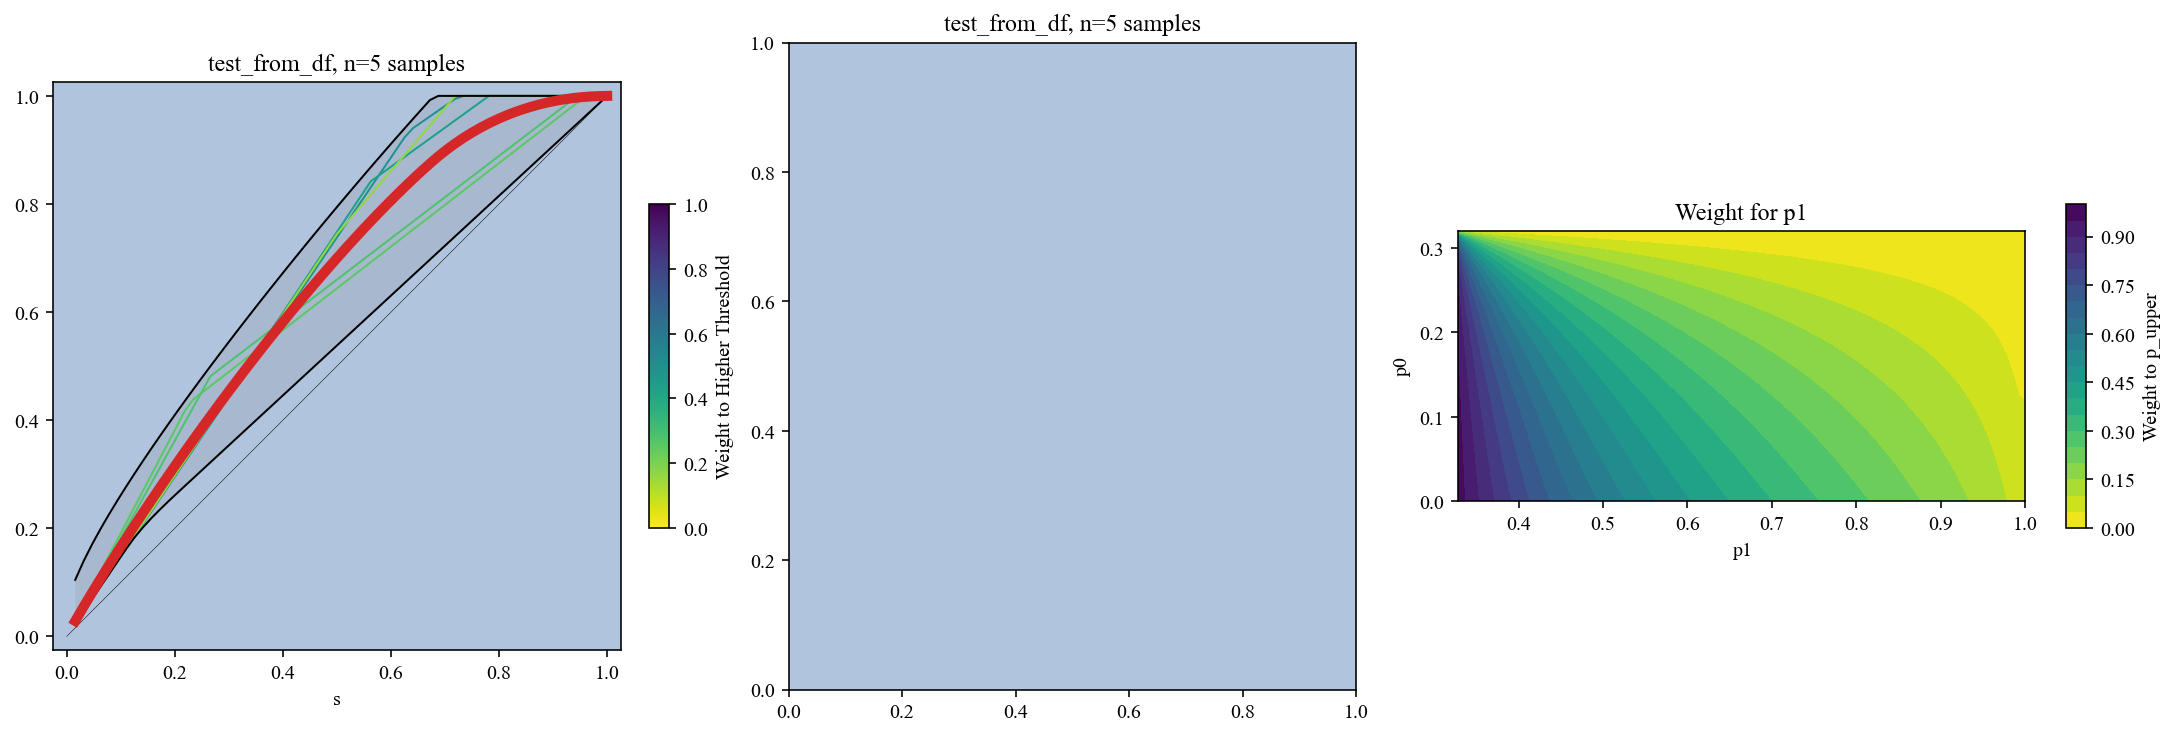

time: 591 ms


In [193]:
%%sf 1 3 5 5
port = res.port 

bd.cloud_view(axs.flatten(), n_resamples=5, distortions=None, title=port.name, alpha=1, pricing=False, check=False)
sm = bd.cloud_df.mean(axis=1)
sm.plot(ax=ax0, c='C3', lw=5)
bd.weight_image(ax2)

In [194]:
ans = {}
for c in a:
    s = a[c]
    mn = np.array(s.idxmin()) * 128
    mx = np.array(s.idxmax()) * 128
    ans[c] = np.hstack((mn, mx))
print(p_star * 128)
bit = pd.DataFrame(ans.values(), index=ans.keys(), columns=['mn_l', 'mn_u', 'mx_l', 'mx_u'])
bit

39.457548850275835


,mn_l,mn_u,mx_l,mx_u
A,0.000,128.000,41.000,42.000
B,0.000,128.000,41.000,42.000
C,0.000,128.000,41.000,42.000
D,0.000,128.000,41.000,42.000
E,0.000,128.000,41.000,42.000
F,0.000,128.000,0.000,127.000
G,0.000,128.000,0.000,127.000
H,0.000,128.000,0.000,127.000
total,41.000,42.000,0.000,128.000


time: 13.8 ms


In [131]:
distortions = {k: v for k, v in port.dists.items() if k in ['ccoc', 'wtdtvar', 'ph', 'wang', 'dual', 'tvar']}
distortions

{'ph': ph (0.7463039175267346),
 'wang': wang (0.3462485860777811),
 'dual': dual (1.6569426299806338),
 'ccoc': ccoc (0.040868011345781725, 0),
 'tvar': tvar (0.29105053409063836),
 'wtdtvar': wtdtvar (0.030195193246917773)}

time: 3 ms


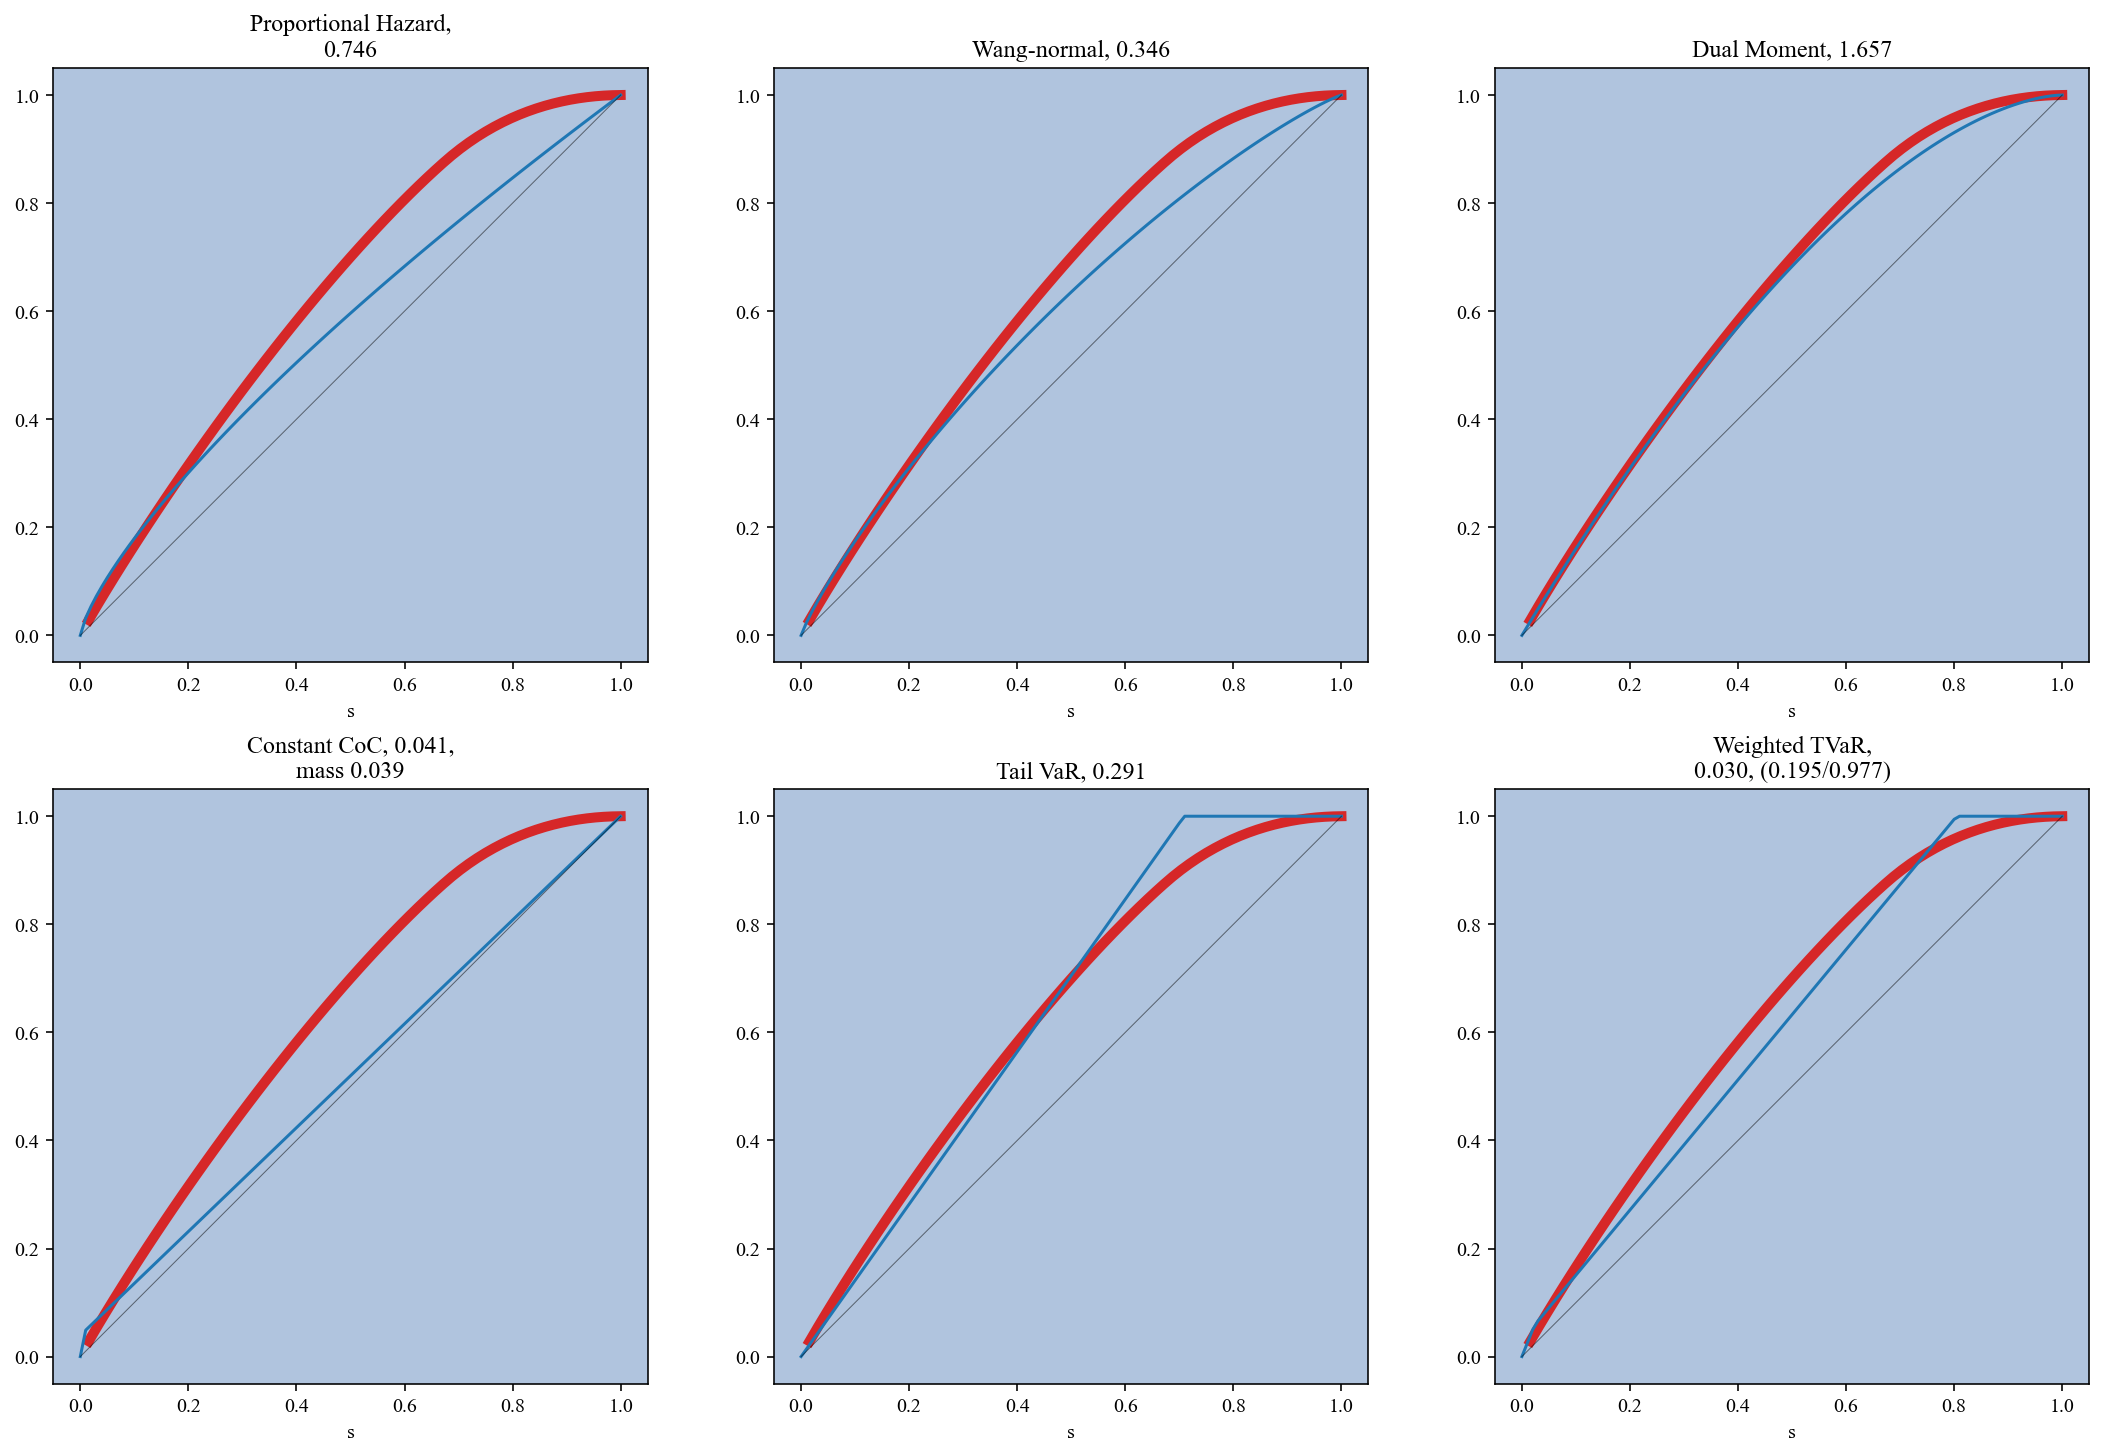

time: 710 ms


In [195]:
%%sf 2 3  5 5
sm = bd.cloud_df.mean(axis=1)
for ax, (k, v) in zip(axs.flat, distortions.items()):
    sm.plot(ax=ax, c='C3', lw=5)
    v.plot(ax=ax, both=False)

In [196]:
ans = {}
for c in a:
    s = a[c]
    c = c[0]
    mn = np.array(s.idxmin()) * 128
    mx = np.array(s.idxmax()) * 128
    ans[c] = np.hstack((mn, mx))
print(p_star * 128)
bit = pd.DataFrame(ans.values(), index=ans.keys(), columns=['mn_l', 'mn_u', 'mx_l', 'mx_u'])
bit

39.457548850275835


,mn_l,mn_u,mx_l,mx_u
A,0.000,128.000,41.000,42.000
B,0.000,128.000,41.000,42.000
C,0.000,128.000,41.000,42.000
D,0.000,128.000,41.000,42.000
E,0.000,128.000,41.000,42.000
F,0.000,128.000,0.000,127.000
G,0.000,128.000,0.000,127.000
H,0.000,128.000,0.000,127.000
total,41.000,42.000,0.000,128.000


time: 12.5 ms


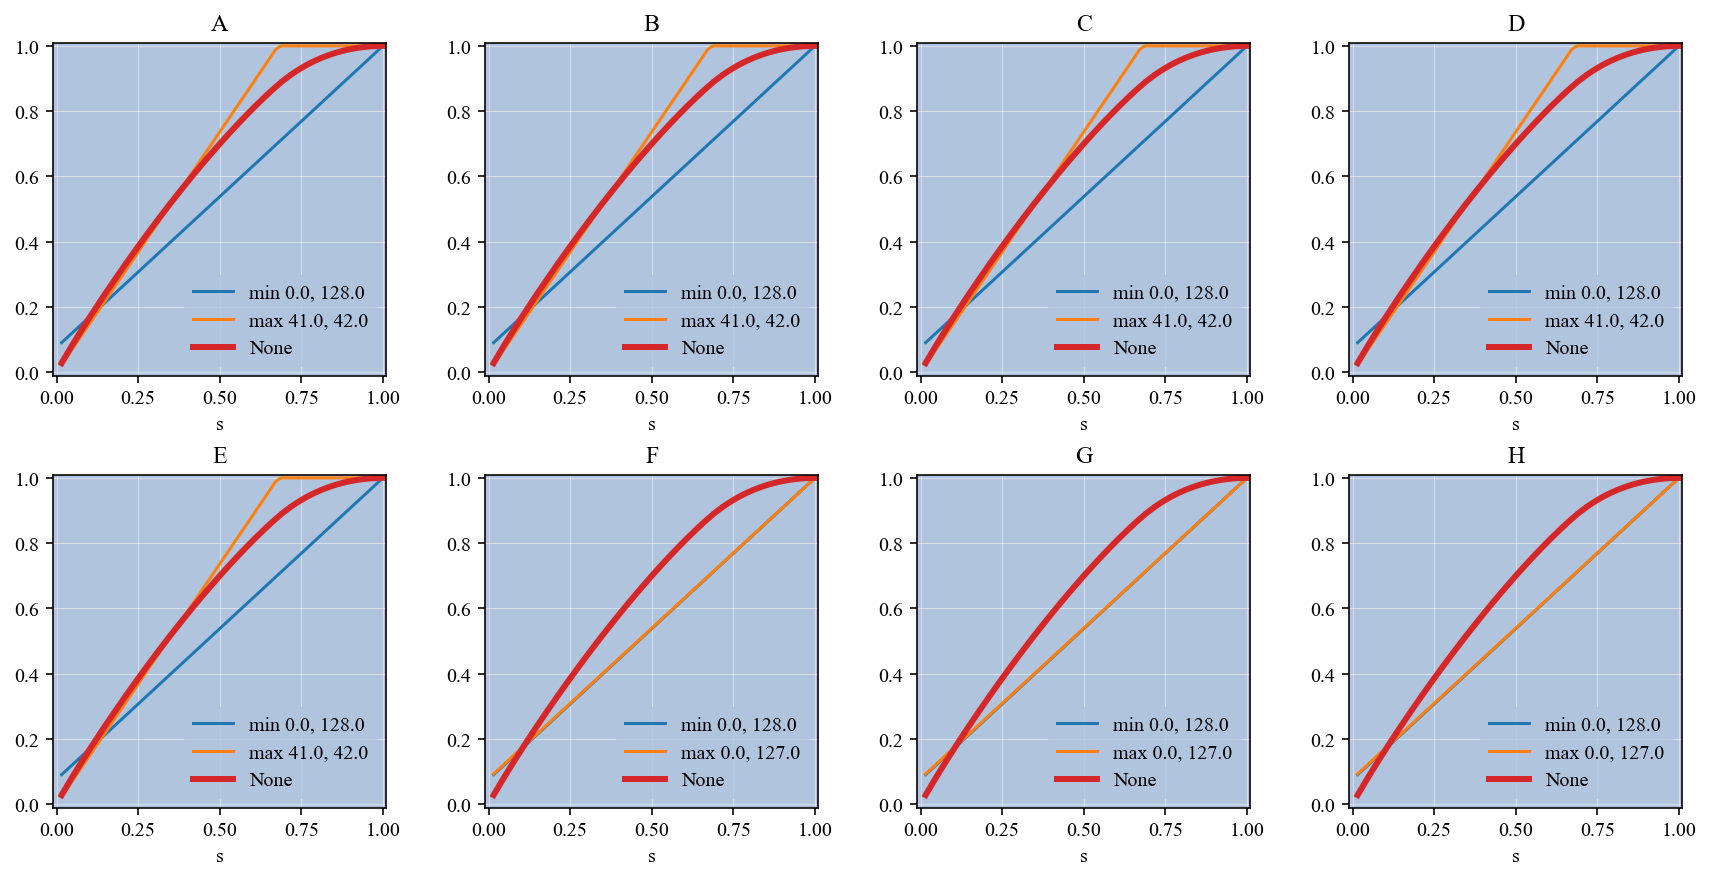

time: 947 ms


In [197]:
%%sf 2 4 3 3 
for ax, (n, r) in zip(axs.flat, bit.iterrows()):
    if n=='Total': 
        ax.remove()
        break
    mnl, mnu, mxl, mxu = r / 128
    bd.cloud_df[(mnl, mnu)].plot(ax=ax, label=f'min {mnl*128}, {mnu*128}')
    bd.cloud_df[(mxl, mxu)].plot(ax=ax, label=f'max {mxl*128}, {mxu*128}')
    sm.plot(ax=ax, c='C3', lw=3)
    ax.legend(loc='lower right')
    ax.set(title=n, xlim=[-0.01,1.01], ylim=[-0.01,1.01], aspect='equal')
    ax.grid(lw=.25, c='w')

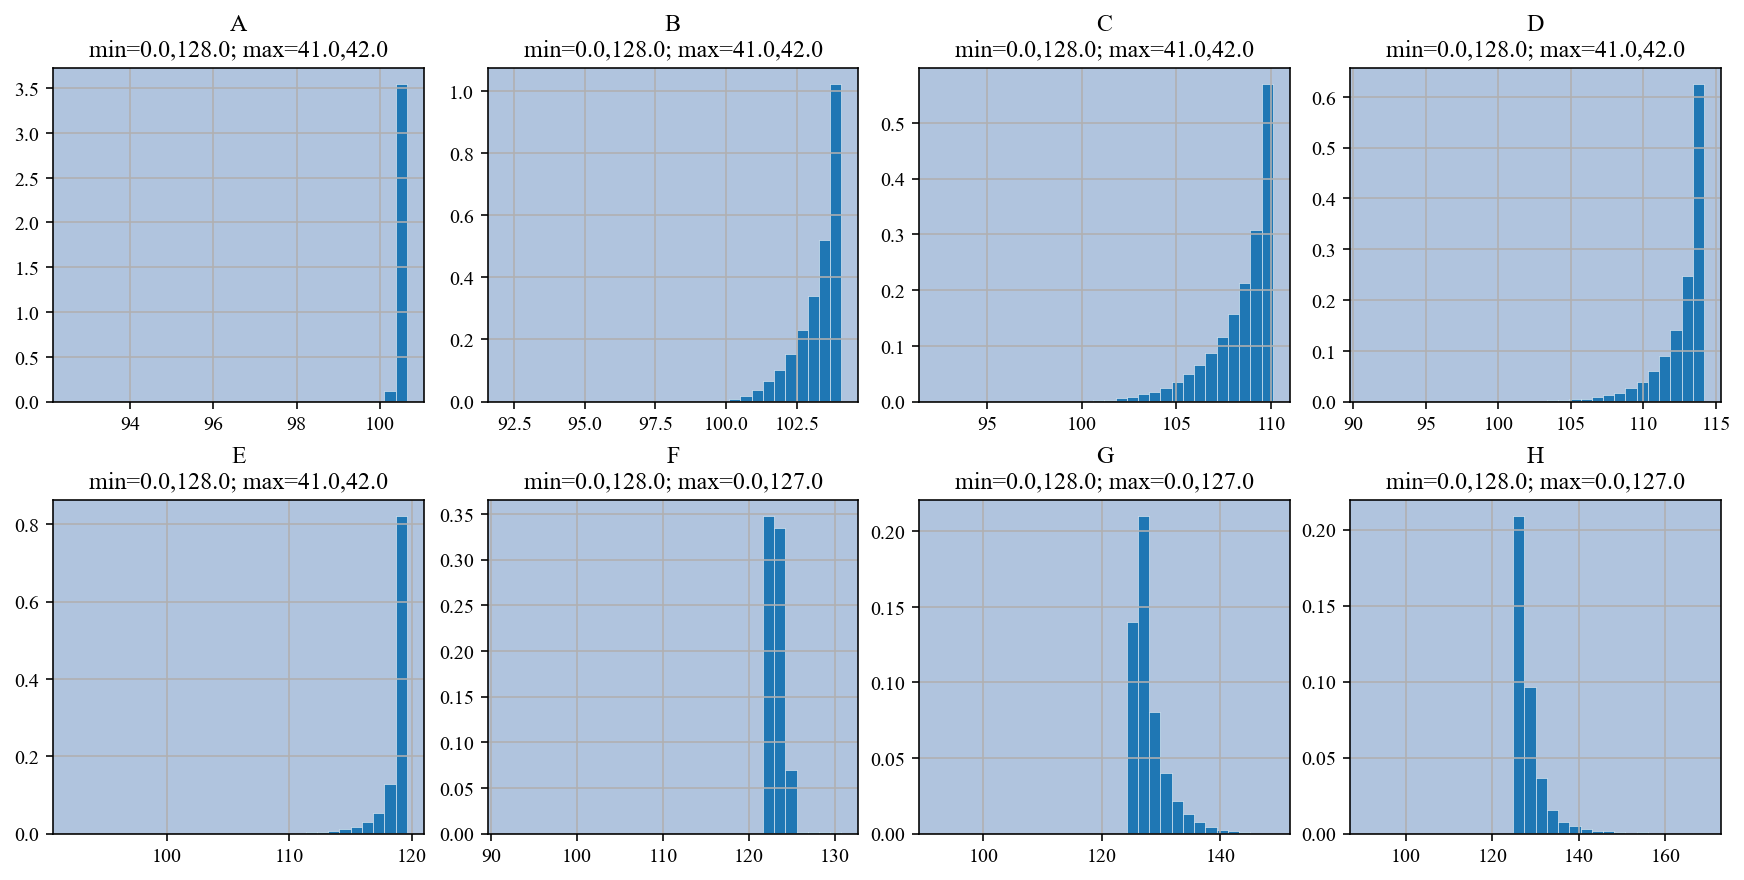

time: 1.08 s


In [198]:
%%sf 2 4 3 3 
for ax, c in zip(axs.flat, a):
    if c[0]=='Total':
        ax.remove()
        break
    data = a[c]
    data.hist(bins=30, density=True, ec='w', lw=.25, ax=ax)
    # ax.legend(loc='lower right')
    mnl, mnu, mxl, mxu = bit.loc[c[0]]  
    ax.set(title=f'{c[0]}\nmin={mnl},{mnu}; max={mxl},{mxu}')

In [199]:
res.sample.mean()[1:]

A    100.199
B     99.726
C     99.852
D     98.366
E     99.561
F     98.916
G     99.409
H     98.336
dtype: float64

time: 6.17 ms


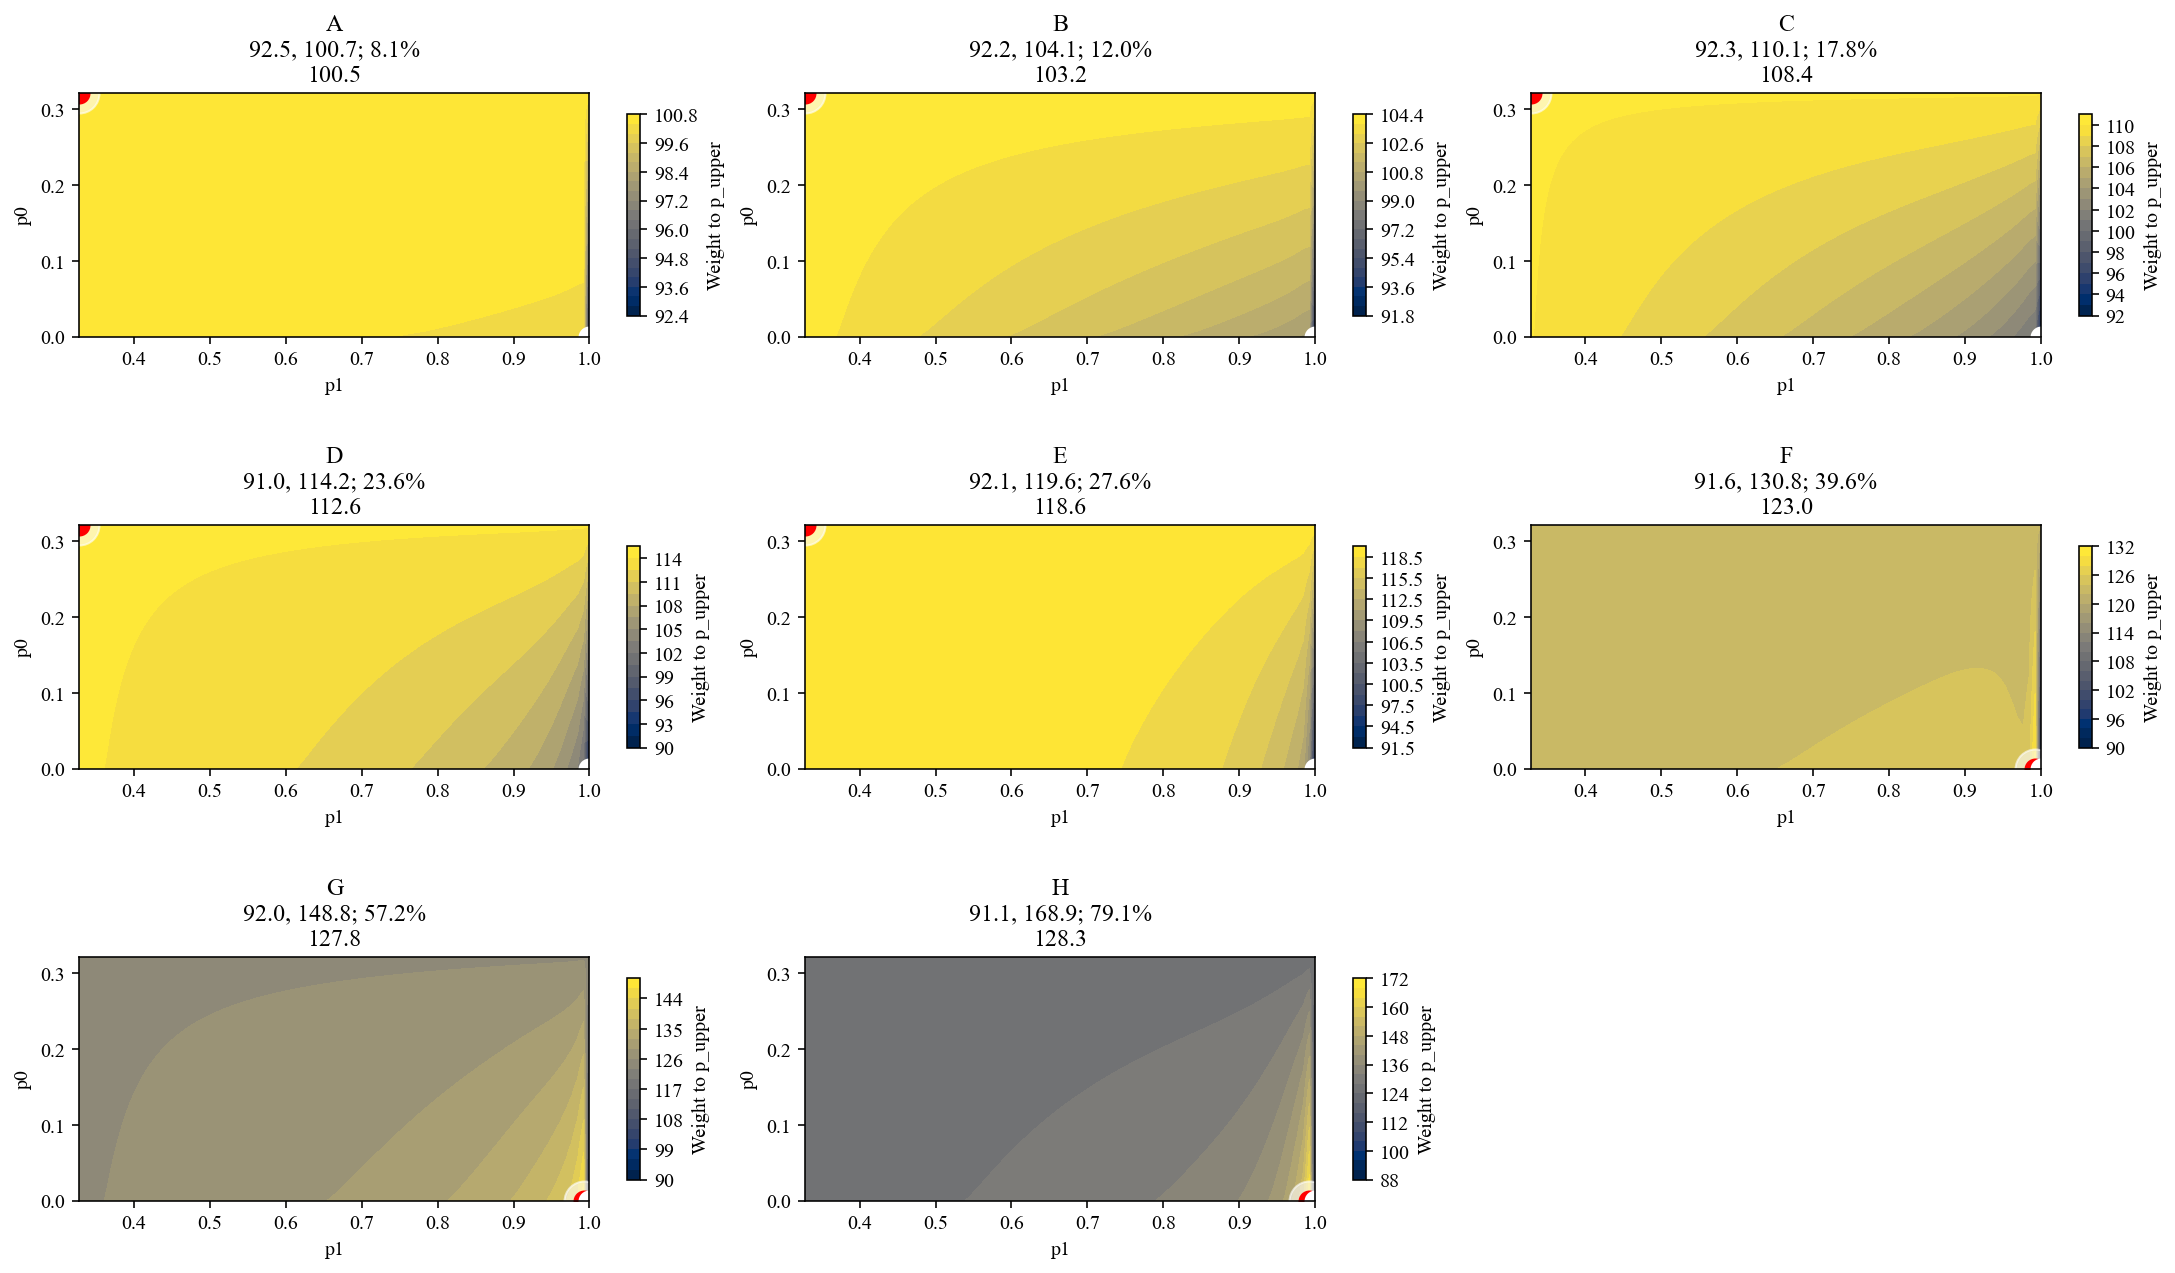

time: 1.88 s


In [204]:
%%sf 3 3 5 3 

ans = {}

for ax, c, m in zip(axs.flat, a, res.sample.mean()[1:]):
    if c[0] == 'Total':
        ax.remove()
        break
    
    bd.weight_df[['alloc']] = a[[c]]

    mx = bd.weight_df[['alloc']].max()
    mx = float(mx)
    mn = bd.weight_df[['alloc']].min()
    mn = float(mn)
    
    bit = bd.weight_df[['alloc']].unstack(1).droplevel(0, axis=1)
    img = ax.contourf(bit.columns, bit.index, bit, cmap='cividis', levels=20, vmin=mn, vmax=mx)
    f.colorbar(img, ax=ax, shrink=.5, aspect=16, label='Weight to p_upper')

    x = bd.weight_df.query('alloc == @mx')
    p0, p1 = x.index[0]
    ax.plot(p1, p0, 'wo', ms=20, alpha=.6)
    ax.plot(p1, p0, 'ro', ms=10)

    x = bd.weight_df.query('alloc == @mn')
    p0, p1 = x.index[0]
    ax.plot(p1, p0, 'wo', ms=10)
    m = float(m)
    ans[c[0]] = float(a[c].mean())
    ax.set(xlabel='p1', ylabel='p0', title=c[0] + f'\n{mn:.1f}, {mx:.1f}; {(mx-mn)/m:.1%}\n{float(a[c].mean()):,.1f}', 
           aspect='equal')
    
axs.flat[-1].remove()